<a href="https://colab.research.google.com/github/esconjaureguy/codon_usage/blob/main/Predicci%C3%B3n_Taxon%C3%B3mica_de_Especies_Usando_Frecuencias_de_Codones%2B_Esconajureguy_61190.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Introducción**



En el campo de la ingeniería genética, contar con herramientas avanzadas para estudiar y caracterizar el producto de determinados genes resulta fundamental(Predecir y mejorar el funcionamiento de genes en diferentes ambientes ayuda a crear medicamentos, mejorar cultivos y fabricar productos biotecnológicos). Estas herramientas permiten no solo realizar análisis funcionales de proteínas y otros productos génicos, sino también predecir y optimizar su comportamiento en distintos contextos biológicos. A través de estas técnicas, se busca comprender de manera precisa el rol y la funcionalidad de los genes para aplicarlos en biotecnología, medicina y agricultura.

Herramientas como los optimizadores de codones, son esenciales para la expresión heteróloga de genes(es decir, expresar genes de una especie en un organismo distinto, como una bacteria), permitiendo adaptar la secuencia genética a los codones con mayor frecuencia de expresión en el organismo hospedador. Optimizar estos, puede mejorar la eficiencia de la traducción y la estabilidad de la proteína, facilitando su expresión en organismos como bacterias o levaduras.

Existen estudios que demuestran que algunos codones son más frecuentes en ciertos organismos que en otros. Esto se debe a lo que se conoce como **sesgo de uso de codones**, donde distintas especies prefieren ciertos codones sobre otros para el mismo aminoácido. Este fenómeno está asociado con la eficiencia de la traducción y la disponibilidad de tRNAs  (RNA de transferencia, que actúan como intermediarios entre el ARN mensajero y los aminoácidos) específicos en cada organismo. Por ejemplo, algunos codones son más comunes en eucariotas que en procariotas, lo que puede influir en la expresión de genes cuando se realiza transferencia génica entre especies.

#**Dataset**

El conjunto de datos examina las frecuencias de uso de codones en el ADN codificante de muestras de organismos de diferentes taxones.

Información de los Atributos:
1.	Kingdom: Un código de 3 letras que corresponde a xxx, indica el reino u origen taxonómico de la secuencia:
'arc' (arquea), 'bct' (bacteria), 'phg' (bacteriófago), 'plm' (plásmido), 'pln' (planta), 'inv' (invertebrado), 'vrt' (vertebrado), 'mam' (mamífero), 'rod' (roedor), 'pri' (primate), y 'vrl' (virus).
2.	DNAtype: Indica el tipo de ADN en la especie, usando un entero:
0: genómico, 1: mitocondrial, 2: cloroplasto, 3: cianela, 4: plastidio, 5: nucleomorfo, 6: endosimbionte secundario, 7: cromoplasto, 8: leucoplasto, 9: NA, 10: proplastidio, 11: apicoplasto, y 12: cinetoplasto.
3.	SpeciesID: Es un identificador único de especie, representado como un entero, que indica cada entrada de un organismo. Este es un identificador de acceso único para cada especie.
4.	Ncodons: La suma algebraica de los codones listados en una entrada de CUTG. Las frecuencias de los codones están normalizadas con respecto al total de codones, por lo tanto, la frecuencia de cada codón es el número de ocurrencias dividido entre Ncodons.
5.	SpeciesName: Representa el nombre de la especie, sin comas, donde estos caracteres fueron reemplazados por espacios para mejorar la interpretación de los datos.
6.	Codon Frequencies: Incluye frecuencias de codones como 'UUU', 'UUA', 'UUG', 'CUU', etc., registrados como flotantes con cinco decimales para cada combinación de bases nucleotídicas.


Sitio donde se obtuvo el dataset

https://www.kaggle.com/datasets/meetnagadia/condon-usage-dataset

#**Objetivo**


1-Según la bibliografía, que demuestra un sesgo en la preferencia de ciertos codones entre reinos biológicos, es posible desarrollar un modelo de clasificación supervisado capaz de aprender patrones distintivos en las frecuencias de codones para predecir con precisión el reino biológico (virus, bacterias, eucariotas) al que pertenece una especie.

2-Basado en una secuencia codificante de ADN, implementar un modelo de machine learning que permita clasificar con precisión al individuo en estudio según su categoría biológica o taxonómica. El enfoque no debe limitarse únicamente a la frecuencia de codones, sino que debe considerar una variedad de características adicionales que puedan influir en la clasificación.

#Análisis del dataset

In [1]:
#Importamos las librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
from collections import Counter
import missingno as msno
import requests
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score


In [2]:
#levanto el data set
df=pd.read_csv('https://raw.githubusercontent.com/esconjaureguy/codon_usage/refs/heads/main/codon_usage.csv')
df

<ipython-input-2-b924aa866b15>:2: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('https://raw.githubusercontent.com/esconjaureguy/codon_usage/refs/heads/main/codon_usage.csv')


,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,vrl,0,100217,1995,Epizootic haematopoietic necrosis virus,0.01654,0.01203,0.00050,0.00351,0.01203,...,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
1,vrl,0,100220,1474,Bohle iridovirus,0.02714,0.01357,0.00068,0.00678,0.00407,...,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
2,vrl,0,100755,4862,Sweet potato leaf curl virus,0.01974,0.0218,0.01357,0.01543,0.00782,...,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
3,vrl,0,100880,1915,Northern cereal mosaic virus,0.01775,0.02245,0.01619,0.00992,0.01567,...,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
4,vrl,0,100887,22831,Soil-borne cereal mosaic virus,0.02816,0.01371,0.00767,0.03679,0.01380,...,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13023,pri,0,9601,1097,Pongo pygmaeus abelii,0.02552,0.03555,0.00547,0.01367,0.01276,...,0.00820,0.01367,0.01094,0.01367,0.02279,0.02005,0.04102,0.00091,0.00091,0.00638
13024,pri,1,9601,2067,mitochondrion Pongo pygmaeus abelii,0.01258,0.03193,0.01984,0.00629,0.01451,...,0.00145,0.00000,0.00048,0.00194,0.01306,0.01838,0.00677,0.00242,0.00097,0.01887
13025,pri,1,9602,1686,mitochondrion Pongo pygmaeus pygmaeus,0.01423,0.03321,0.01661,0.00356,0.01127,...,0.00000,0.00000,0.00000,0.00178,0.01661,0.02788,0.00297,0.00356,0.00119,0.02017
13026,pri,0,9606,40662582,Homo sapiens,0.01757,0.02028,0.00767,0.01293,0.01319,...,0.01142,0.01217,0.01196,0.02178,0.02510,0.02896,0.03959,0.00099,0.00079,0.00156


In [3]:
df.shape

(13028, 69)

In [4]:
dup=df.duplicated().sum()
dup

0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13028 entries, 0 to 13027
Data columns (total 69 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Kingdom      13028 non-null  object 
 1   DNAtype      13028 non-null  int64  
 2   SpeciesID    13028 non-null  int64  
 3   Ncodons      13028 non-null  int64  
 4   SpeciesName  13028 non-null  object 
 5   UUU          13028 non-null  object 
 6   UUC          13028 non-null  object 
 7   UUA          13028 non-null  float64
 8   UUG          13028 non-null  float64
 9   CUU          13028 non-null  float64
 10  CUC          13028 non-null  float64
 11  CUA          13028 non-null  float64
 12  CUG          13028 non-null  float64
 13  AUU          13028 non-null  float64
 14  AUC          13028 non-null  float64
 15  AUA          13028 non-null  float64
 16  AUG          13028 non-null  float64
 17  GUU          13028 non-null  float64
 18  GUC          13028 non-null  float64
 19  GUA 

In [6]:
#ver los valores de mi posible variables target
print(df['Kingdom'].unique())
print(df['SpeciesName'].unique())

['vrl' 'arc' 'bct' 'phg' 'plm' 'pln' 'inv' 'vrt' 'mam' 'rod' 'pri']
['Epizootic haematopoietic necrosis virus' 'Bohle iridovirus'
 'Sweet potato leaf curl virus' ...
 'mitochondrion Pongo pygmaeus pygmaeus' 'Homo sapiens'
 'mitochondrion Homo sapiens']


vrl (Virus)
bct (Bacterias)
pln (Plantas)
ani (Animales)
arc (Arqueas)
fun (Hongos)

<Axes: >

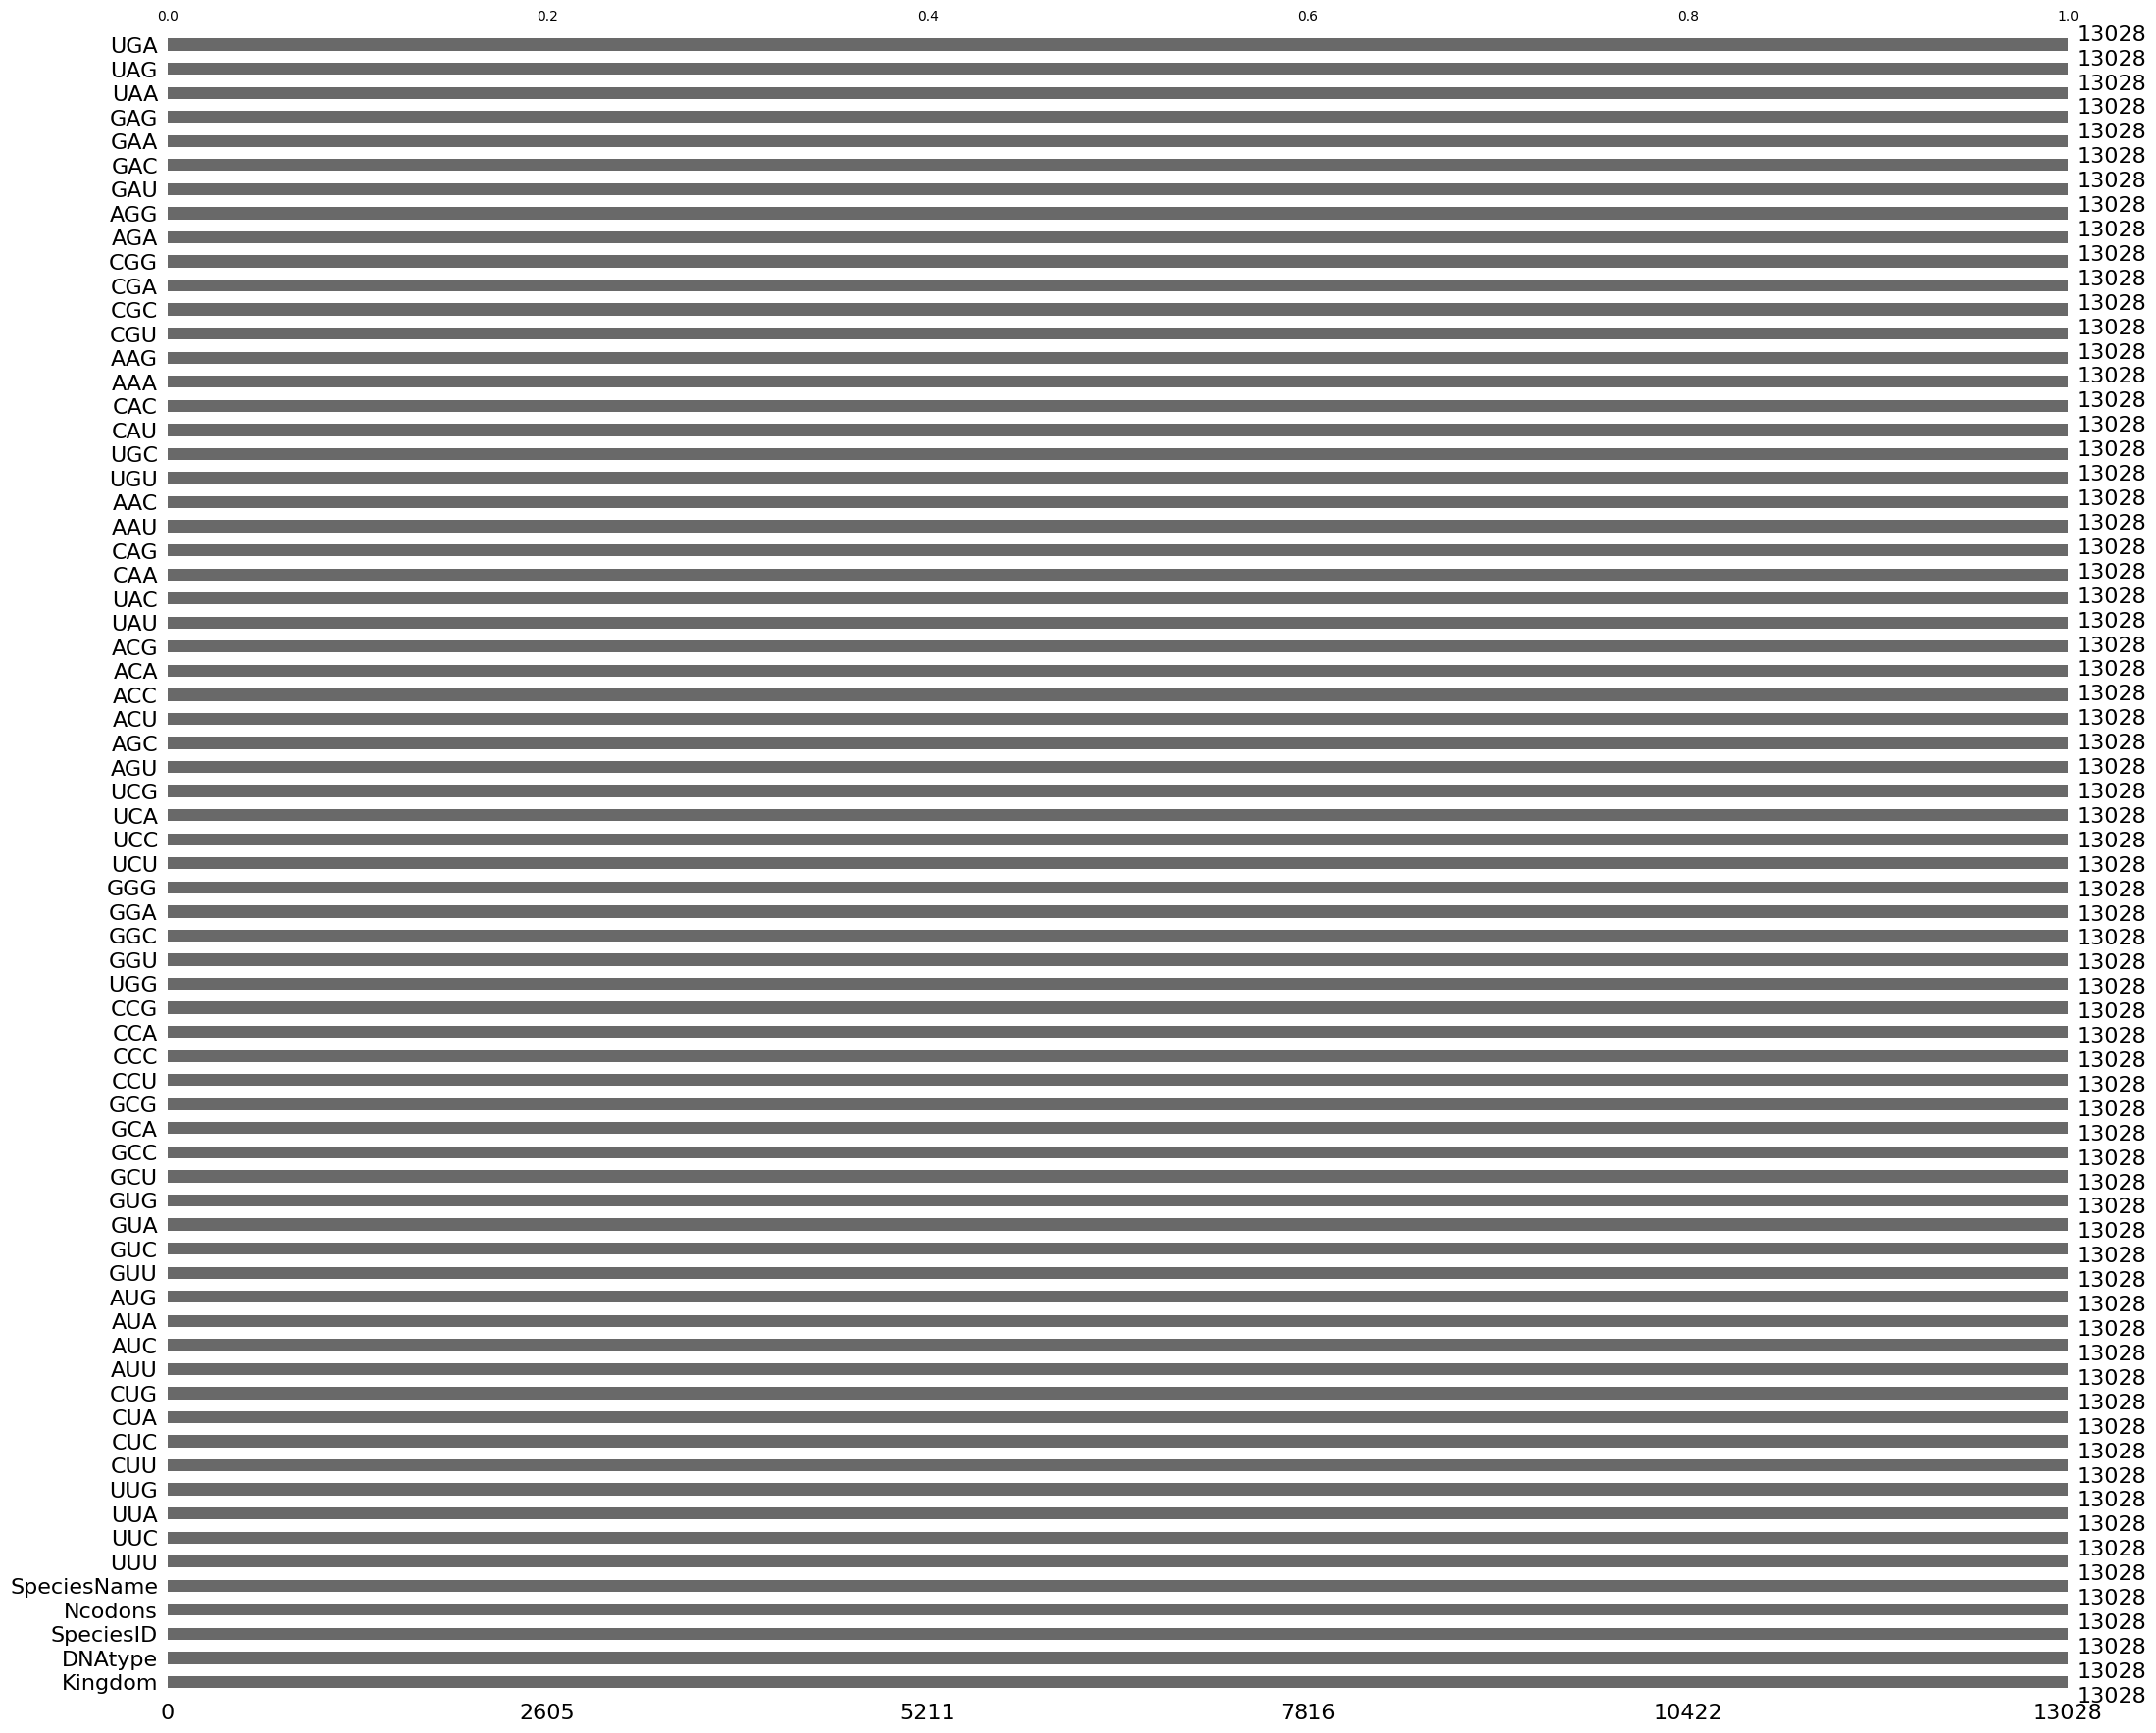

In [7]:
# Visualización de los valores nulos en un gráfico de barras
msno.bar(df)

In [8]:
df.isnull().sum().sum()

0

No hay valores nulos


#**Data Acquisition**

In [9]:
# Datos que se extraen de la url:https://www.ensembl.org/Multi/Search/Results?q=35s;site=ensembl;page=1;facet_feature_type=Gene

data = """TRAV35 (Human Gene)
ENSG00000211814 14:22221896-22222475:1
T cell receptor alpha variable 35 [Source:HGNC Symbol;Acc:HGNC:12134].
MAT2A (Human Gene)
ENSG00000168906 2:85539168-85545281:1
Methionine adenosyltransferase 2A [Source:HGNC Symbol;Acc:HGNC:6904].
Washc3 (Mouse Gene, Strain: reference (CL57BL6))
ENSMUSG00000020056 10:88036955-88082020:1
WASH complex subunit 3 [Source:MGI Symbol;Acc:MGI:1914532].
Anks1b (Mouse Gene, Strain: reference (CL57BL6))
ENSMUSG00000058589 10:89709371-90809162:1
Ankyrin repeat and sterile alpha motif domain containing 1B [Source:MGI Symbol;Acc:MGI:1924781].
prss35 (Zebrafish Gene)
ENSDARG00000109353 ALT_CTG16_1_16:20084-21340:1
Serine protease 35 [Source:ZFIN;Acc:ZDB-GENE-040704-55].
novel gene (Collared flycatcher Gene)
ENSFALG00000011108 22:3645843-3650821:-1
Novel gene.
novel gene (Baker's yeast Gene)
RDN37-1 XII:451786-457732:-1
35S ribosomal RNA (35S rRNA) transcript; encoded by the RDN1 locus; processed into the 25S, 18S and 5.8S rRNAs (represented by the RDN25, RDN18, and RDN58 loci) [Source:SGD;Acc:S000006486].
novel gene (Baker's yeast Gene)
RDN37-2 XII:460923-466869:-1
35S ribosomal RNA (35S rRNA) transcript; encoded by the RDN1 locus; processed into the 25S, 18S and 5.8S rRNAs (represented by the RDN25, RDN18, and RDN58 loci) [Source:SGD;Acc:S000006487].
novel gene (Baker's yeast Gene)
snR30 XII:198784-199389:1
H/ACA box small nucleolar RNA (snoRNA); essential gene required for cleavage of 35S primary rRNA transcript to release the precursor to the 18S rRNA [Source:SGD;Acc:S000007497].
novel gene (Sea squirt Ciona savignyi Gene)
ENSCSAVG00000009688 reftig_19:2490319-2492332:-1
Novel gene."""

# Procesar datos
genes_info = []
lines = data.strip().split('\n')

for i in range(0, len(lines), 3):
    nombre_gen = lines[i].strip()
    id_gen = lines[i + 1].strip().split()[0]
    localizacion = lines[i + 1].strip().split()[1]
    descripcion = lines[i + 2].strip()

    genes_info.append({"Nombre": nombre_gen, "ID": id_gen, "Localización": localizacion, "Descripción": descripcion})

# Crear DataFrame
df_genes = pd.DataFrame(genes_info)

# Crear lista de IDs
id_list = df_genes['ID'].tolist()

df_genes

,Nombre,ID,Localización,Descripción
0,TRAV35 (Human Gene),ENSG00000211814,14:22221896-22222475:1,T cell receptor alpha variable 35 [Source:HGNC...
1,MAT2A (Human Gene),ENSG00000168906,2:85539168-85545281:1,Methionine adenosyltransferase 2A [Source:HGNC...
2,"Washc3 (Mouse Gene, Strain: reference (CL57BL6))",ENSMUSG00000020056,10:88036955-88082020:1,WASH complex subunit 3 [Source:MGI Symbol;Acc:...
3,"Anks1b (Mouse Gene, Strain: reference (CL57BL6))",ENSMUSG00000058589,10:89709371-90809162:1,Ankyrin repeat and sterile alpha motif domain ...
4,prss35 (Zebrafish Gene),ENSDARG00000109353,ALT_CTG16_1_16:20084-21340:1,Serine protease 35 [Source:ZFIN;Acc:ZDB-GENE-0...
5,novel gene (Collared flycatcher Gene),ENSFALG00000011108,22:3645843-3650821:-1,Novel gene.
6,novel gene (Baker's yeast Gene),RDN37-1,XII:451786-457732:-1,35S ribosomal RNA (35S rRNA) transcript; encod...
7,novel gene (Baker's yeast Gene),RDN37-2,XII:460923-466869:-1,35S ribosomal RNA (35S rRNA) transcript; encod...
8,novel gene (Baker's yeast Gene),snR30,XII:198784-199389:1,H/ACA box small nucleolar RNA (snoRNA); essent...
9,novel gene (Sea squirt Ciona savignyi Gene),ENSCSAVG00000009688,reftig_19:2490319-2492332:-1,Novel gene.


In [10]:
df_genes = df_genes.rename(columns={'ID': 'Gene_ID'})

In [11]:
# tomo la informacón de los de la API en la pagina rest.esembl.org


server = "https://rest.ensembl.org"
ext = "/sequence/id/RDN37-1?"

gene_ids = ['ENSG00000211814','ENSG00000168906', 'ENSMUSG00000020056', 'ENSMUSG00000058589', 'ENSDARG00000109353', 'ENSFALG00000011108', 'RDN37-1', 'RDN37-2', 'snR30']

# Crear una lista para almacenar las secuencias obtenidas
secuencias = []

# Iterar sobre cada ID y hacer la solicitud a la API
for gene_id in gene_ids:
    ext = f"/sequence/id/{gene_id}?"
    r = requests.get(server + ext, headers={"Content-Type": "text/plain"})

    if not r.ok:
        r.raise_for_status()

    # Agregar la secuencia a la lista
    secuencias.append(r.text.strip())  # Guardamos la secuencia

# Creo el DataFrame desde cero a partir de los IDs de genes y las secuencias obtenidas
df_genes = pd.DataFrame({
    'Gene_ID': gene_ids,
    'Secuencia': secuencias
})

df_genes


,Gene_ID,Secuencia
0,ENSG00000211814,ATGCTCCTTGAACATTTATTAATAATCTTGTGGATGCAGCTGACAT...
1,ENSG00000168906,GTTCGCTCCGCGCCGCCCGCCTGCTACGAGTAGAACGCTGTCCGCA...
2,ENSMUSG00000020056,GCCTCTCTGAAGCCACCCATTGAATGGTGAACACTCGCGCTTTCTT...
3,ENSMUSG00000058589,GTAGAAGCTGCGCGGAGAGAAGGAGGACGGCGTGCTGCTCCCTGCG...
4,ENSDARG00000109353,ATGGGCCCGGTACCCTTAACGCTCCTGCTTTCCATCTCAGCACTGG...
5,ENSFALG00000011108,ATGTTGTTTGGAGCTTTGAATCCTGACTGTGGGGAAGGGAAGGAGG...
6,RDN37-1,TATCTGGTTGATCCTGCCAGTAGTCATATGCTTGTCTCAAAGATTA...
7,RDN37-2,TATCTGGTTGATCCTGCCAGTAGTCATATGCTTGTCTCAAAGATTA...
8,snR30,AACCATAGTCTCGTGCTAGTTCGGTACTATACAGGGAAGGGAAGTC...


In [12]:
# Convertir las secuencias de ADN a ARN (reemplazar T por U)
df_genes['Secuencia_ARN'] = df_genes['Secuencia'].apply(lambda sec: sec.replace('T', 'U'))

df_genes

,Gene_ID,Secuencia,Secuencia_ARN
0,ENSG00000211814,ATGCTCCTTGAACATTTATTAATAATCTTGTGGATGCAGCTGACAT...,AUGCUCCUUGAACAUUUAUUAAUAAUCUUGUGGAUGCAGCUGACAU...
1,ENSG00000168906,GTTCGCTCCGCGCCGCCCGCCTGCTACGAGTAGAACGCTGTCCGCA...,GUUCGCUCCGCGCCGCCCGCCUGCUACGAGUAGAACGCUGUCCGCA...
2,ENSMUSG00000020056,GCCTCTCTGAAGCCACCCATTGAATGGTGAACACTCGCGCTTTCTT...,GCCUCUCUGAAGCCACCCAUUGAAUGGUGAACACUCGCGCUUUCUU...
3,ENSMUSG00000058589,GTAGAAGCTGCGCGGAGAGAAGGAGGACGGCGTGCTGCTCCCTGCG...,GUAGAAGCUGCGCGGAGAGAAGGAGGACGGCGUGCUGCUCCCUGCG...
4,ENSDARG00000109353,ATGGGCCCGGTACCCTTAACGCTCCTGCTTTCCATCTCAGCACTGG...,AUGGGCCCGGUACCCUUAACGCUCCUGCUUUCCAUCUCAGCACUGG...
5,ENSFALG00000011108,ATGTTGTTTGGAGCTTTGAATCCTGACTGTGGGGAAGGGAAGGAGG...,AUGUUGUUUGGAGCUUUGAAUCCUGACUGUGGGGAAGGGAAGGAGG...
6,RDN37-1,TATCTGGTTGATCCTGCCAGTAGTCATATGCTTGTCTCAAAGATTA...,UAUCUGGUUGAUCCUGCCAGUAGUCAUAUGCUUGUCUCAAAGAUUA...
7,RDN37-2,TATCTGGTTGATCCTGCCAGTAGTCATATGCTTGTCTCAAAGATTA...,UAUCUGGUUGAUCCUGCCAGUAGUCAUAUGCUUGUCUCAAAGAUUA...
8,snR30,AACCATAGTCTCGTGCTAGTTCGGTACTATACAGGGAAGGGAAGTC...,AACCAUAGUCUCGUGCUAGUUCGGUACUAUACAGGGAAGGGAAGUC...


In [13]:
# Función para dividir la secuencia de ARN en codones (tripletes)
def obtener_codones(secuencia):
# Dividir la secuencia en tripletes (codones)
    codones = [secuencia[i:i+3] for i in range(0, len(secuencia), 3)]
    return codones

# Aplicar la función a la columna 'Secuencia_ARN' y crear una nueva columna con los codones
df_genes['Codones'] =df_genes['Secuencia_ARN'].apply(obtener_codones)
df_genes['Ncodons'] = df_genes['Codones'].apply(len)

df_genes

,Gene_ID,Secuencia,Secuencia_ARN,Codones,Ncodons
0,ENSG00000211814,ATGCTCCTTGAACATTTATTAATAATCTTGTGGATGCAGCTGACAT...,AUGCUCCUUGAACAUUUAUUAAUAAUCUUGUGGAUGCAGCUGACAU...,"[AUG, CUC, CUU, GAA, CAU, UUA, UUA, AUA, AUC, ...",194
1,ENSG00000168906,GTTCGCTCCGCGCCGCCCGCCTGCTACGAGTAGAACGCTGTCCGCA...,GUUCGCUCCGCGCCGCCCGCCUGCUACGAGUAGAACGCUGUCCGCA...,"[GUU, CGC, UCC, GCG, CCG, CCC, GCC, UGC, UAC, ...",2038
2,ENSMUSG00000020056,GCCTCTCTGAAGCCACCCATTGAATGGTGAACACTCGCGCTTTCTT...,GCCUCUCUGAAGCCACCCAUUGAAUGGUGAACACUCGCGCUUUCUU...,"[GCC, UCU, CUG, AAG, CCA, CCC, AUU, GAA, UGG, ...",15022
3,ENSMUSG00000058589,GTAGAAGCTGCGCGGAGAGAAGGAGGACGGCGTGCTGCTCCCTGCG...,GUAGAAGCUGCGCGGAGAGAAGGAGGACGGCGUGCUGCUCCCUGCG...,"[GUA, GAA, GCU, GCG, CGG, AGA, GAA, GGA, GGA, ...",366598
4,ENSDARG00000109353,ATGGGCCCGGTACCCTTAACGCTCCTGCTTTCCATCTCAGCACTGG...,AUGGGCCCGGUACCCUUAACGCUCCUGCUUUCCAUCUCAGCACUGG...,"[AUG, GGC, CCG, GUA, CCC, UUA, ACG, CUC, CUG, ...",419
5,ENSFALG00000011108,ATGTTGTTTGGAGCTTTGAATCCTGACTGTGGGGAAGGGAAGGAGG...,AUGUUGUUUGGAGCUUUGAAUCCUGACUGUGGGGAAGGGAAGGAGG...,"[AUG, UUG, UUU, GGA, GCU, UUG, AAU, CCU, GAC, ...",1660
6,RDN37-1,TATCTGGTTGATCCTGCCAGTAGTCATATGCTTGTCTCAAAGATTA...,UAUCUGGUUGAUCCUGCCAGUAGUCAUAUGCUUGUCUCAAAGAUUA...,"[UAU, CUG, GUU, GAU, CCU, GCC, AGU, AGU, CAU, ...",1983
7,RDN37-2,TATCTGGTTGATCCTGCCAGTAGTCATATGCTTGTCTCAAAGATTA...,UAUCUGGUUGAUCCUGCCAGUAGUCAUAUGCUUGUCUCAAAGAUUA...,"[UAU, CUG, GUU, GAU, CCU, GCC, AGU, AGU, CAU, ...",1983
8,snR30,AACCATAGTCTCGTGCTAGTTCGGTACTATACAGGGAAGGGAAGTC...,AACCAUAGUCUCGUGCUAGUUCGGUACUAUACAGGGAAGGGAAGUC...,"[AAC, CAU, AGU, CUC, GUG, CUA, GUU, CGG, UAC, ...",202


In [14]:
# Diccionario para almacenar la frecuencia de codones para cada gene_id
frecuencia_codones_por_gen = {}

# Iterar sobre cada gene_id
for gene_id in gene_ids:

    # Obtener los codones del gen
    codones_gen = df_genes[df_genes['Gene_ID'] == gene_id]['Codones'].values[0]

    # Uso Counter para contar la frecuencia de cada codón
    frecuencia_codones = Counter(codones_gen)

    # Calcular el número total de codones en el gen
    total_codones = sum(frecuencia_codones.values())

    # Normalizar dividiendo la frecuencia de cada codón por el total de codones
    frecuencia_codones_normalizada = {codon: freq / total_codones for codon, freq in frecuencia_codones.items()}

    # Guardar la frecuencia normalizada en el diccionario
    frecuencia_codones_por_gen[gene_id] = frecuencia_codones_normalizada

# Convertir el diccionario de frecuencias normalizadas a un DataFrame
df_frecuencias_codones_normalizadas = pd.DataFrame.from_dict(frecuencia_codones_por_gen, orient='index').fillna(0)

df_frecuencias_codones_normalizadas

,AUG,CUC,CUU,GAA,CAU,UUA,AUA,AUC,UUG,UGG,...,GUC,UCG,ACG,CGG,CGU,AGU,AAU,A,GG,U
ENSG00000211814,0.015464,0.025773,0.030928,0.036082,0.025773,0.010309,0.015464,0.025773,0.005155,0.036082,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000168906,0.020118,0.011286,0.023062,0.016683,0.014720,0.026987,0.012267,0.009814,0.024043,0.023062,...,0.009814,0.005888,0.005888,0.005397,0.003925,0.016192,0.019627,0.000000,0.000000,0.000000
ENSMUSG00000020056,0.016642,0.019438,0.021568,0.016775,0.016775,0.019372,0.018972,0.013048,0.020104,0.019105,...,0.010651,0.002796,0.002263,0.002396,0.003395,0.016709,0.021302,0.000000,0.000000,0.000000
ENSMUSG00000058589,0.019220,0.017651,0.022736,0.019692,0.020158,0.020306,0.020649,0.013792,0.020112,0.017545,...,0.010832,0.002046,0.002264,0.002070,0.002695,0.016751,0.021462,0.000003,0.000000,0.000000
ENSDARG00000109353,0.011933,0.011933,0.009547,0.016706,0.007160,0.004773,0.004773,0.021480,0.011933,0.016706,...,0.021480,0.002387,0.009547,0.019093,0.016706,0.009547,0.016706,0.000000,0.000000,0.000000
ENSFALG00000011108,0.003614,0.006024,0.001205,0.147590,0.005422,0.001807,0.000000,0.003614,0.006627,0.010843,...,0.001205,0.002410,0.000000,0.000602,0.002410,0.004819,0.007831,0.000000,0.000602,0.000000
RDN37-1,0.017650,0.013111,0.019163,0.029249,0.011599,0.012607,0.015633,0.011094,0.032274,0.021684,...,0.010590,0.009581,0.015633,0.015633,0.009077,0.022189,0.027736,0.000000,0.000000,0.000504
RDN37-2,0.017650,0.013111,0.019163,0.029249,0.011599,0.012607,0.015633,0.011094,0.032274,0.021684,...,0.010590,0.009581,0.015633,0.015633,0.009077,0.022189,0.027736,0.000000,0.000000,0.000504
snR30,0.014851,0.019802,0.019802,0.004950,0.039604,0.009901,0.014851,0.014851,0.034653,0.019802,...,0.009901,0.024752,0.014851,0.014851,0.014851,0.029703,0.000000,0.000000,0.000000,0.000000


In [15]:
# Unir dos DataFrame por la columna ID
df_unido = pd.merge(df_genes, df_frecuencias_codones_normalizadas, left_on='Gene_ID', right_index=True, how='inner')
df_unido.columns

Index(['Gene_ID', 'Secuencia', 'Secuencia_ARN', 'Codones', 'Ncodons', 'AUG',
       'CUC', 'CUU', 'GAA', 'CAU', 'UUA', 'AUA', 'AUC', 'UUG', 'UGG', 'CAG',
       'CUG', 'ACA', 'UGU', 'GAG', 'UCU', 'UGA', 'UUU', 'ACU', 'CCA', 'UAG',
       'CGA', 'AUU', 'CUA', 'AAG', 'GGA', 'AGG', 'AAA', 'UUC', 'GGC', 'AGA',
       'GAC', 'UAU', 'CAC', 'UGC', 'GCU', 'GGG', 'GGU', 'GAU', 'GUG', 'UCC',
       'AAC', 'UAA', 'CCU', 'UCA', 'GUU', 'UAC', 'GUA', 'CAA', 'GCA', 'CCC',
       'AGC', 'ACC', 'G', 'CGC', 'GCG', 'CCG', 'GCC', 'GUC', 'UCG', 'ACG',
       'CGG', 'CGU', 'AGU', 'AAU', 'A', 'GG', 'U'],
      dtype='object')

In [16]:
#elimino columnas con datos incosistentes y relevantes
df_unido = df_unido.drop(columns=['G','A','U'])
df_unido

,Gene_ID,Secuencia,Secuencia_ARN,Codones,Ncodons,AUG,CUC,CUU,GAA,CAU,...,CCG,GCC,GUC,UCG,ACG,CGG,CGU,AGU,AAU,GG
0,ENSG00000211814,ATGCTCCTTGAACATTTATTAATAATCTTGTGGATGCAGCTGACAT...,AUGCUCCUUGAACAUUUAUUAAUAAUCUUGUGGAUGCAGCUGACAU...,"[AUG, CUC, CUU, GAA, CAU, UUA, UUA, AUA, AUC, ...",194,0.015464,0.025773,0.030928,0.036082,0.025773,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,ENSG00000168906,GTTCGCTCCGCGCCGCCCGCCTGCTACGAGTAGAACGCTGTCCGCA...,GUUCGCUCCGCGCCGCCCGCCUGCUACGAGUAGAACGCUGUCCGCA...,"[GUU, CGC, UCC, GCG, CCG, CCC, GCC, UGC, UAC, ...",2038,0.020118,0.011286,0.023062,0.016683,0.014720,...,0.007360,0.011776,0.009814,0.005888,0.005888,0.005397,0.003925,0.016192,0.019627,0.000000
2,ENSMUSG00000020056,GCCTCTCTGAAGCCACCCATTGAATGGTGAACACTCGCGCTTTCTT...,GCCUCUCUGAAGCCACCCAUUGAAUGGUGAACACUCGCGCUUUCUU...,"[GCC, UCU, CUG, AAG, CCA, CCC, AUU, GAA, UGG, ...",15022,0.016642,0.019438,0.021568,0.016775,0.016775,...,0.003129,0.010451,0.010651,0.002796,0.002263,0.002396,0.003395,0.016709,0.021302,0.000000
3,ENSMUSG00000058589,GTAGAAGCTGCGCGGAGAGAAGGAGGACGGCGTGCTGCTCCCTGCG...,GUAGAAGCUGCGCGGAGAGAAGGAGGACGGCGUGCUGCUCCCUGCG...,"[GUA, GAA, GCU, GCG, CGG, AGA, GAA, GGA, GGA, ...",366598,0.019220,0.017651,0.022736,0.019692,0.020158,...,0.002147,0.009708,0.010832,0.002046,0.002264,0.002070,0.002695,0.016751,0.021462,0.000000
4,ENSDARG00000109353,ATGGGCCCGGTACCCTTAACGCTCCTGCTTTCCATCTCAGCACTGG...,AUGGGCCCGGUACCCUUAACGCUCCUGCUUUCCAUCUCAGCACUGG...,"[AUG, GGC, CCG, GUA, CCC, UUA, ACG, CUC, CUG, ...",419,0.011933,0.011933,0.009547,0.016706,0.007160,...,0.007160,0.007160,0.021480,0.002387,0.009547,0.019093,0.016706,0.009547,0.016706,0.000000
5,ENSFALG00000011108,ATGTTGTTTGGAGCTTTGAATCCTGACTGTGGGGAAGGGAAGGAGG...,AUGUUGUUUGGAGCUUUGAAUCCUGACUGUGGGGAAGGGAAGGAGG...,"[AUG, UUG, UUU, GGA, GCU, UUG, AAU, CCU, GAC, ...",1660,0.003614,0.006024,0.001205,0.147590,0.005422,...,0.001205,0.003012,0.001205,0.002410,0.000000,0.000602,0.002410,0.004819,0.007831,0.000602
6,RDN37-1,TATCTGGTTGATCCTGCCAGTAGTCATATGCTTGTCTCAAAGATTA...,UAUCUGGUUGAUCCUGCCAGUAGUCAUAUGCUUGUCUCAAAGAUUA...,"[UAU, CUG, GUU, GAU, CCU, GCC, AGU, AGU, CAU, ...",1983,0.017650,0.013111,0.019163,0.029249,0.011599,...,0.013111,0.012103,0.010590,0.009581,0.015633,0.015633,0.009077,0.022189,0.027736,0.000000
7,RDN37-2,TATCTGGTTGATCCTGCCAGTAGTCATATGCTTGTCTCAAAGATTA...,UAUCUGGUUGAUCCUGCCAGUAGUCAUAUGCUUGUCUCAAAGAUUA...,"[UAU, CUG, GUU, GAU, CCU, GCC, AGU, AGU, CAU, ...",1983,0.017650,0.013111,0.019163,0.029249,0.011599,...,0.013111,0.012103,0.010590,0.009581,0.015633,0.015633,0.009077,0.022189,0.027736,0.000000
8,snR30,AACCATAGTCTCGTGCTAGTTCGGTACTATACAGGGAAGGGAAGTC...,AACCAUAGUCUCGUGCUAGUUCGGUACUAUACAGGGAAGGGAAGUC...,"[AAC, CAU, AGU, CUC, GUG, CUA, GUU, CGG, UAC, ...",202,0.014851,0.019802,0.019802,0.004950,0.039604,...,0.000000,0.004950,0.009901,0.024752,0.014851,0.014851,0.014851,0.029703,0.000000,0.000000


In [17]:
# Agregar la columna 'DNAtype' con valor 0 poque los nueve genes obtenidos de la API son genómico
df_unido['DNAtype'] = 0

# Agregar la columna 'Kingdom' con el valor 'ani' yaq ue todos los genes pertenecen al reino animal
DF=df_unido['Kingdom'] = 'ani'
df_unido.columns

Index(['Gene_ID', 'Secuencia', 'Secuencia_ARN', 'Codones', 'Ncodons', 'AUG',
       'CUC', 'CUU', 'GAA', 'CAU', 'UUA', 'AUA', 'AUC', 'UUG', 'UGG', 'CAG',
       'CUG', 'ACA', 'UGU', 'GAG', 'UCU', 'UGA', 'UUU', 'ACU', 'CCA', 'UAG',
       'CGA', 'AUU', 'CUA', 'AAG', 'GGA', 'AGG', 'AAA', 'UUC', 'GGC', 'AGA',
       'GAC', 'UAU', 'CAC', 'UGC', 'GCU', 'GGG', 'GGU', 'GAU', 'GUG', 'UCC',
       'AAC', 'UAA', 'CCU', 'UCA', 'GUU', 'UAC', 'GUA', 'CAA', 'GCA', 'CCC',
       'AGC', 'ACC', 'CGC', 'GCG', 'CCG', 'GCC', 'GUC', 'UCG', 'ACG', 'CGG',
       'CGU', 'AGU', 'AAU', 'GG', 'DNAtype', 'Kingdom'],
      dtype='object')

# **Data Wrangling**

In [18]:
#junto lo dos data set. El adquirido en kaagle (df) y el obtenido por la API de ENSEMBL (DF)
DF_final = pd.concat([df_unido, df], axis=0)
DF_final.columns


Index(['Gene_ID', 'Secuencia', 'Secuencia_ARN', 'Codones', 'Ncodons', 'AUG',
       'CUC', 'CUU', 'GAA', 'CAU', 'UUA', 'AUA', 'AUC', 'UUG', 'UGG', 'CAG',
       'CUG', 'ACA', 'UGU', 'GAG', 'UCU', 'UGA', 'UUU', 'ACU', 'CCA', 'UAG',
       'CGA', 'AUU', 'CUA', 'AAG', 'GGA', 'AGG', 'AAA', 'UUC', 'GGC', 'AGA',
       'GAC', 'UAU', 'CAC', 'UGC', 'GCU', 'GGG', 'GGU', 'GAU', 'GUG', 'UCC',
       'AAC', 'UAA', 'CCU', 'UCA', 'GUU', 'UAC', 'GUA', 'CAA', 'GCA', 'CCC',
       'AGC', 'ACC', 'CGC', 'GCG', 'CCG', 'GCC', 'GUC', 'UCG', 'ACG', 'CGG',
       'CGU', 'AGU', 'AAU', 'GG', 'DNAtype', 'Kingdom', 'SpeciesID',
       'SpeciesName'],
      dtype='object')

In [19]:
DF_final = DF_final.loc[:, ~DF_final.columns.duplicated()]

In [20]:
#ver todas lasvariables que tiene el data set
DF_final.dtypes.value_counts()

,count
float64,64
object,8
int64,2


In [21]:
#veo si hay valore nulos.
DF_final.isnull().sum()

,0
Gene_ID,13028
Secuencia,13028
Secuencia_ARN,13028
Codones,13028
Ncodons,0
...,...
GG,13028
DNAtype,0
Kingdom,0
SpeciesID,9


<Axes: >

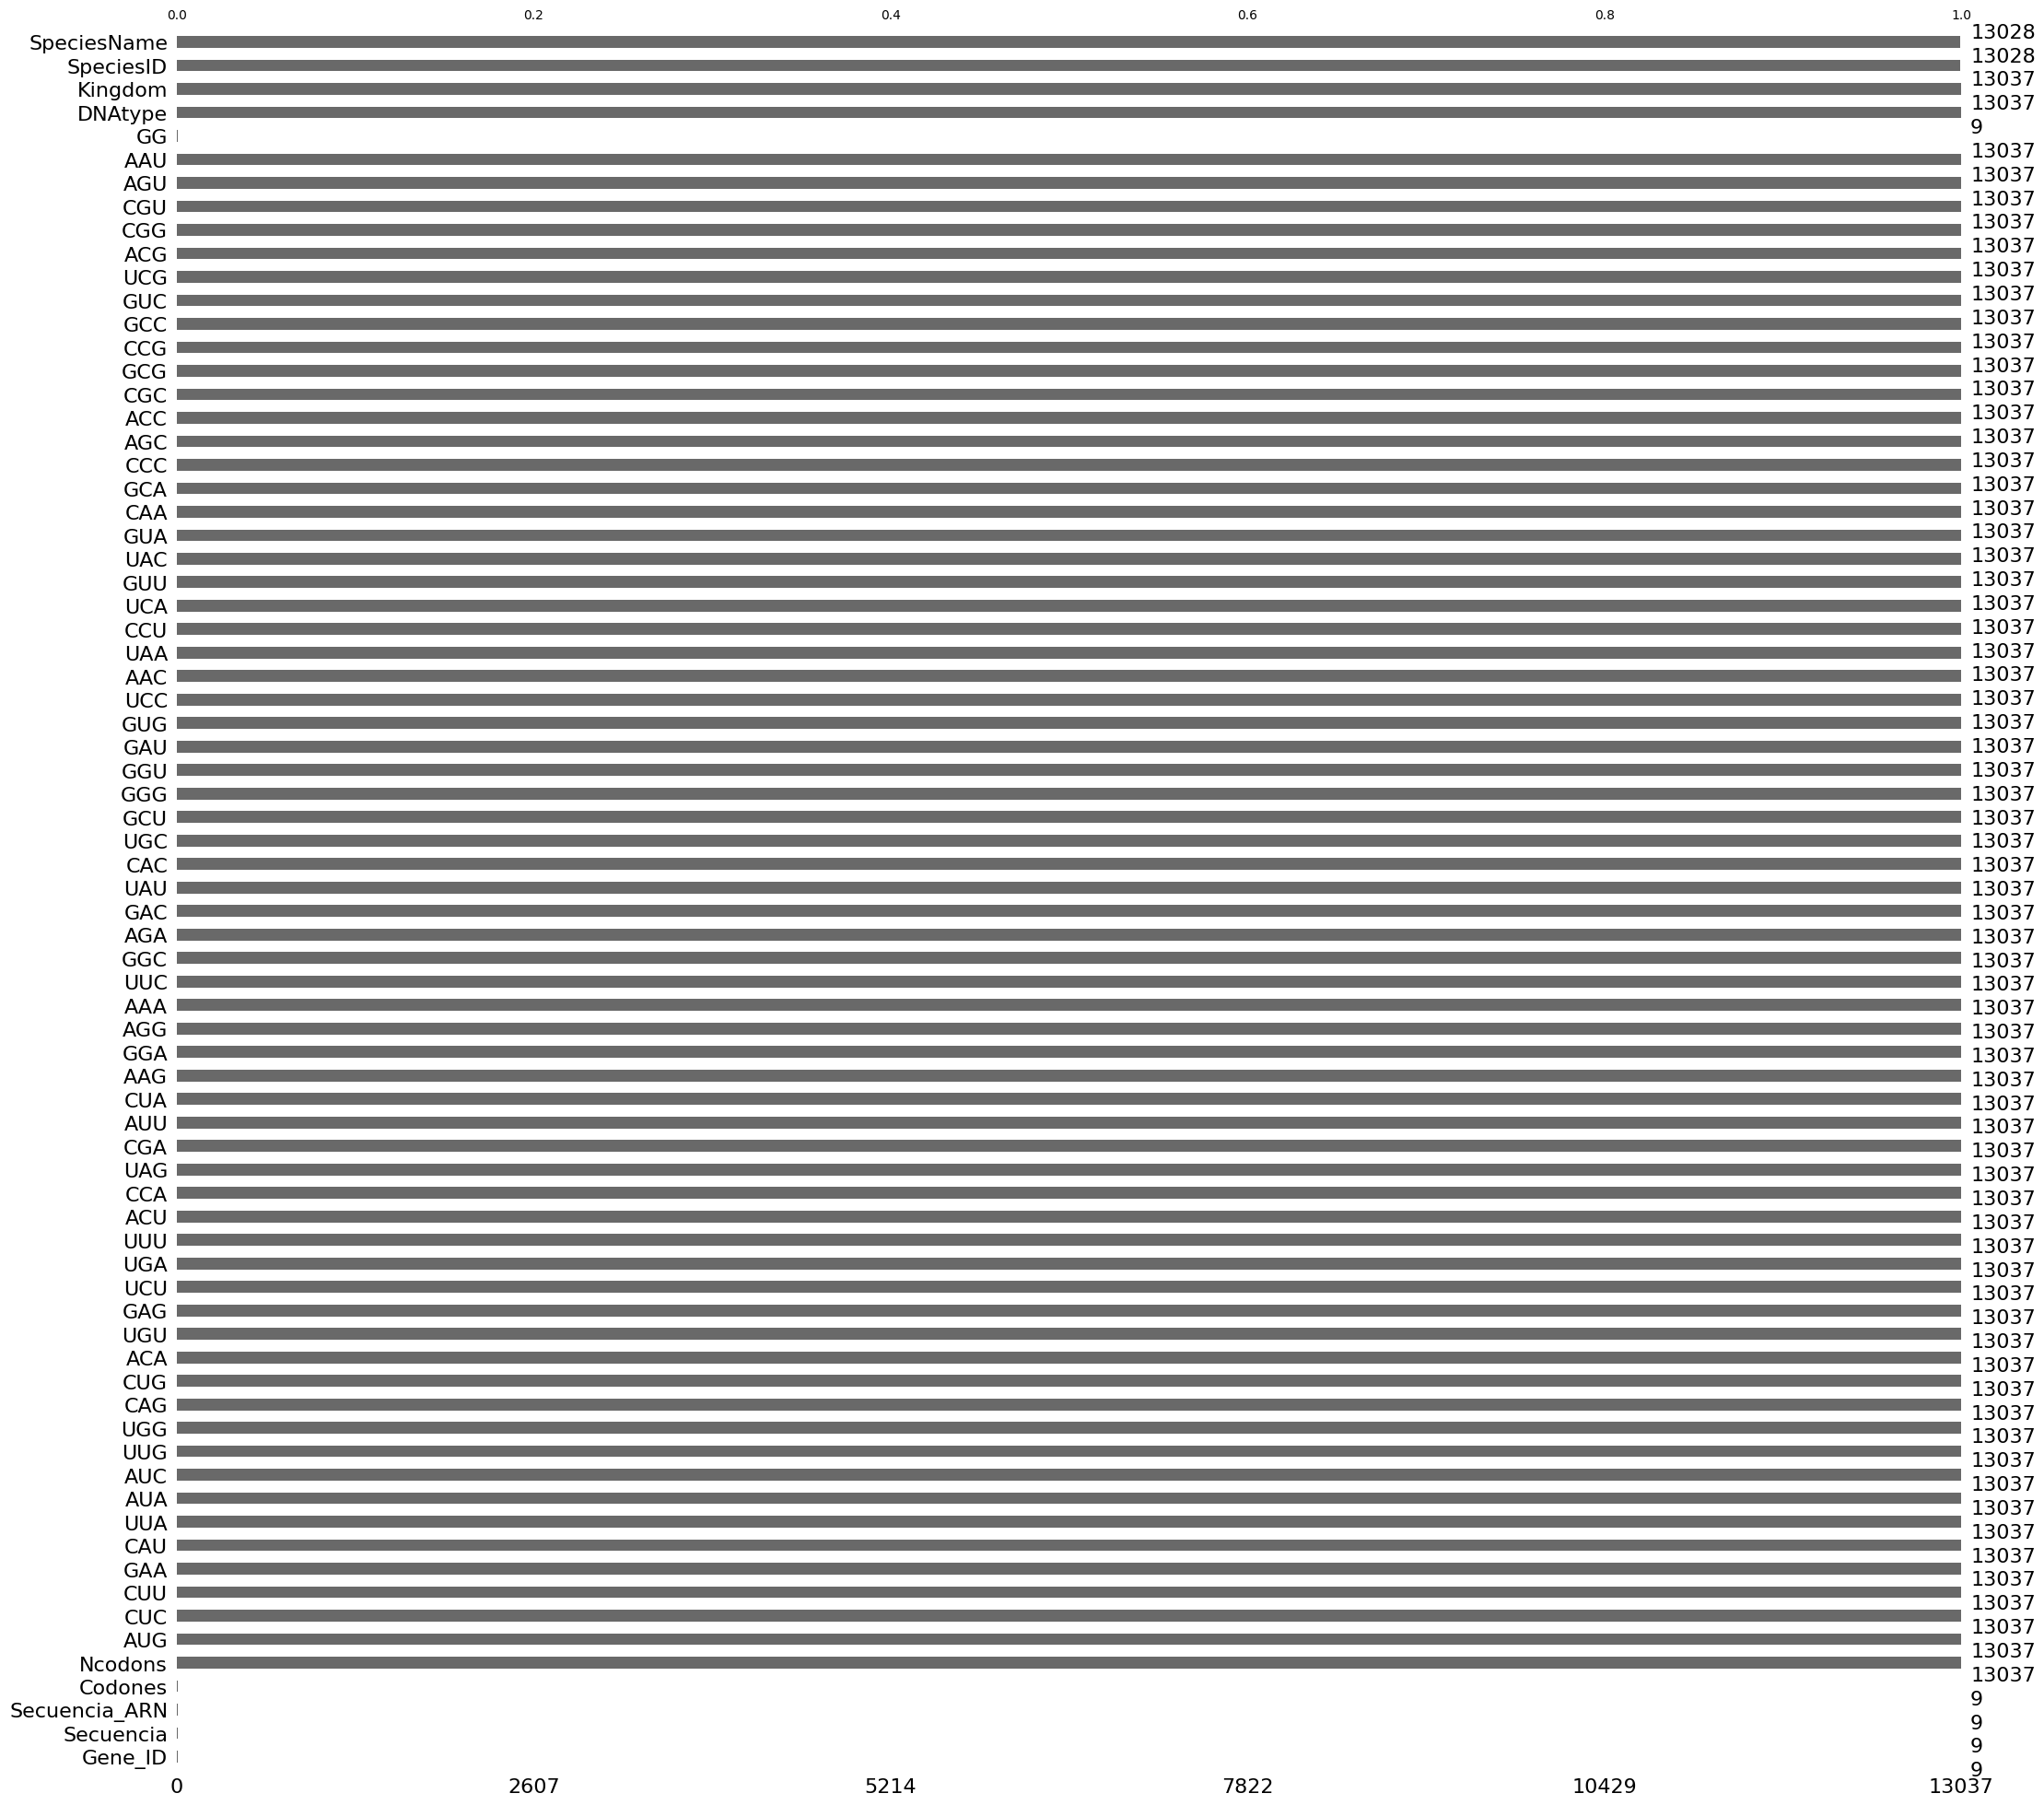

In [22]:
msno.bar(DF_final)

In [23]:
#Elimino las columnaS con valores nulos. Se eliminan porque son reelevantes al objetivo del proyecto
DF_final=DF_final.drop(columns=['GG','Codones','Secuencia', 'Secuencia_ARN','Gene_ID'])
DF_final.columns

Index(['Ncodons', 'AUG', 'CUC', 'CUU', 'GAA', 'CAU', 'UUA', 'AUA', 'AUC',
       'UUG', 'UGG', 'CAG', 'CUG', 'ACA', 'UGU', 'GAG', 'UCU', 'UGA', 'UUU',
       'ACU', 'CCA', 'UAG', 'CGA', 'AUU', 'CUA', 'AAG', 'GGA', 'AGG', 'AAA',
       'UUC', 'GGC', 'AGA', 'GAC', 'UAU', 'CAC', 'UGC', 'GCU', 'GGG', 'GGU',
       'GAU', 'GUG', 'UCC', 'AAC', 'UAA', 'CCU', 'UCA', 'GUU', 'UAC', 'GUA',
       'CAA', 'GCA', 'CCC', 'AGC', 'ACC', 'CGC', 'GCG', 'CCG', 'GCC', 'GUC',
       'UCG', 'ACG', 'CGG', 'CGU', 'AGU', 'AAU', 'DNAtype', 'Kingdom',
       'SpeciesID', 'SpeciesName'],
      dtype='object')

In [24]:
DF_final.isnull().sum().sum()

18

In [25]:
#analizo la precencia de duplicados
duplicados = DF_final.duplicated()
duplicados

,0
0,False
1,False
2,False
3,False
4,False
...,...
13023,False
13024,False
13025,False
13026,False


In [26]:
total_duplicados = DF_final.duplicated().sum()
total_duplicados

1

In [27]:
#veo en mi dataset cuantas columnas objetos tengo
objeto = DF_final.select_dtypes(include=['object']).columns
objeto

Index(['UUU', 'UUC', 'Kingdom', 'SpeciesName'], dtype='object')

In [28]:
#pasamos las variables 'UUU'y 'UUC' a string
valor_problema = 'non-B hepatitis virus'
filas_problema =DF_final[DF_final['UUU'] == valor_problema]
filas_problema

,Ncodons,AUG,CUC,CUU,GAA,CAU,UUA,AUA,AUC,UUG,...,UCG,ACG,CGG,CGU,AGU,AAU,DNAtype,Kingdom,SpeciesID,SpeciesName
486,1238,0.00323,0.03554,0.01292,0.01696,0.01292,0.021,0.01212,0.02666,0.01292,...,0.00242,0.00323,0.00081,0.02423,0.00808,0.02181,0,vrl,12440.0,Non-A


In [29]:
valor_problema = '-'
filas_problema =DF_final[DF_final['UUC'] == valor_problema]
filas_problema

,Ncodons,AUG,CUC,CUU,GAA,CAU,UUA,AUA,AUC,UUG,...,UCG,ACG,CGG,CGU,AGU,AAU,DNAtype,Kingdom,SpeciesID,SpeciesName
5063,1698,0.0212,0.01296,0.01178,0.02945,0.00589,0.0212,0.0212,0.06949,0.02356,...,0.01178,0.01531,0.03062,0.01885,0.00471,0.00824,0,bct,353569.0,Salmonella enterica subsp. enterica serovar 4


In [30]:
#elimino las filas con valores atípico del dataset
DF_final = DF_final.drop([486, 5063])
DF_final

,Ncodons,AUG,CUC,CUU,GAA,CAU,UUA,AUA,AUC,UUG,...,UCG,ACG,CGG,CGU,AGU,AAU,DNAtype,Kingdom,SpeciesID,SpeciesName
0,194,0.015464,0.025773,0.030928,0.036082,0.025773,0.010309,0.015464,0.025773,0.005155,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,ani,NaN,NaN
1,2038,0.020118,0.011286,0.023062,0.016683,0.014720,0.026987,0.012267,0.009814,0.024043,...,0.005888,0.005888,0.005397,0.003925,0.016192,0.019627,0,ani,NaN,NaN
2,15022,0.016642,0.019438,0.021568,0.016775,0.016775,0.019372,0.018972,0.013048,0.020104,...,0.002796,0.002263,0.002396,0.003395,0.016709,0.021302,0,ani,NaN,NaN
3,366598,0.019220,0.017651,0.022736,0.019692,0.020158,0.020306,0.020649,0.013792,0.020112,...,0.002046,0.002264,0.002070,0.002695,0.016751,0.021462,0,ani,NaN,NaN
4,419,0.011933,0.011933,0.009547,0.016706,0.007160,0.004773,0.004773,0.021480,0.011933,...,0.002387,0.009547,0.019093,0.016706,0.009547,0.016706,0,ani,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13023,1097,0.020970,0.020970,0.012760,0.020050,0.013670,0.005470,0.010030,0.039200,0.013670,...,0.000910,0.008200,0.008200,0.001820,0.017320,0.020050,0,pri,9601.0,Pongo pygmaeus abelii
13024,2067,0.012580,0.053220,0.014510,0.018380,0.002900,0.019840,0.034350,0.063860,0.006290,...,0.001450,0.004840,0.001450,0.000970,0.003390,0.008220,1,pri,9601.0,mitochondrion Pongo pygmaeus abelii
13025,1686,0.012460,0.050420,0.011270,0.027880,0.004740,0.016610,0.026690,0.066430,0.003560,...,0.000000,0.007120,0.000000,0.001190,0.001190,0.006520,1,pri,9602.0,mitochondrion Pongo pygmaeus pygmaeus
13026,40662582,0.022040,0.019590,0.013190,0.028960,0.010860,0.007670,0.007490,0.020820,0.012930,...,0.004410,0.006050,0.011420,0.004540,0.012130,0.016960,0,pri,9606.0,Homo sapiens


In [31]:
#veo cuales son mis columnas objetos
objeto = DF_final.select_dtypes(include=['object']).columns
objeto

Index(['UUU', 'UUC', 'Kingdom', 'SpeciesName'], dtype='object')

In [32]:
#las varable UUU y UUC son varaibles numericas. Las convierto
DF_final['UUU'] = DF_final['UUU'].astype(float)
DF_final['UUC'] = DF_final['UUC'].astype(float)



Análsis univariado


<ipython-input-33-1f19b8ac3341>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=DF_final, x='Kingdom', palette='viridis')


<Axes: xlabel='Kingdom', ylabel='count'>

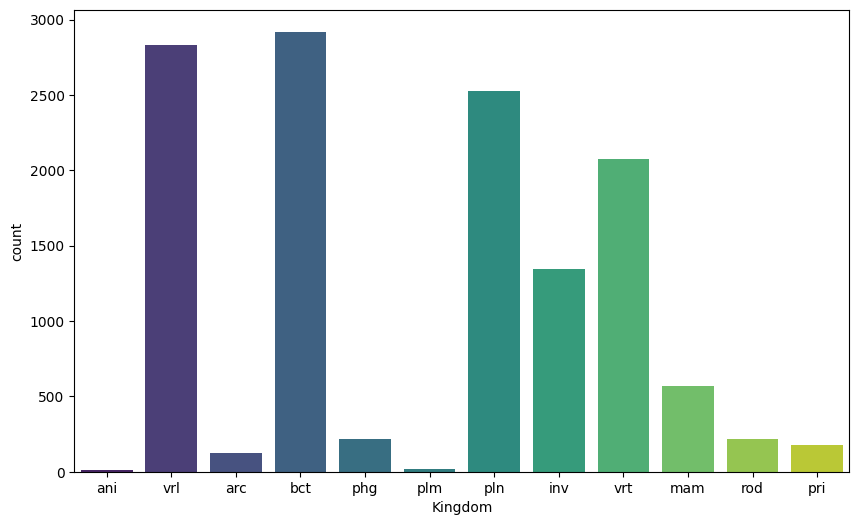

In [33]:
#¿Es adecuada la variable Kingdom como objetivo para un modelo de predicción?
# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
sns.countplot(data=DF_final, x='Kingdom', palette='viridis')

El data set no se encuetra equilibrado. Se debe Implementar estrategias para equilibrar

<ipython-input-34-0c6df0692795>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=DF_final, x='Kingdom', palette='viridis')


<Axes: xlabel='Kingdom', ylabel='count'>

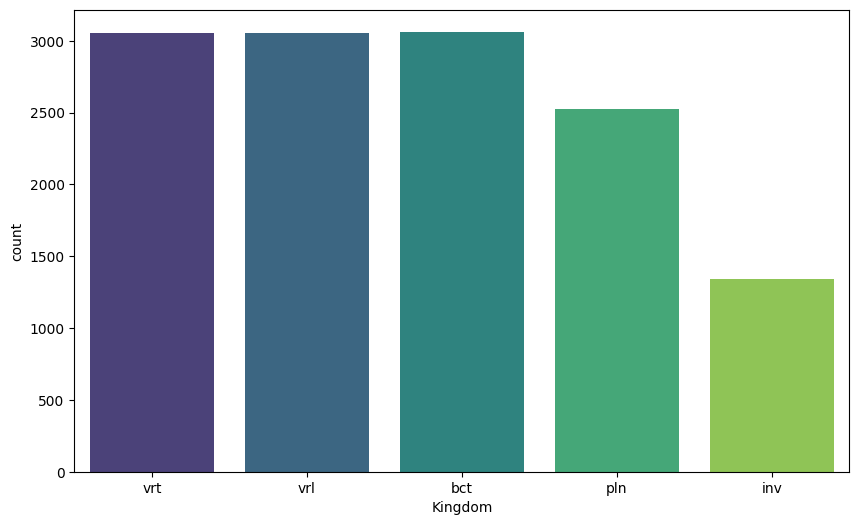

In [34]:
#equilibro el data set agrupando columnas
# Definir los valores a reemplazar
valores_a_reemplazar1 = ['pri', 'rod', 'mam','ani']
valores_a_reemplazar2 = ['phg']
valores_a_reemplazar3 = ['arc','plm']
# Reemplazar los valores
DF_final['Kingdom'] = DF_final['Kingdom'].replace(valores_a_reemplazar1, 'vrt')
DF_final['Kingdom'] = DF_final['Kingdom'].replace(valores_a_reemplazar2, 'vrl')
DF_final['Kingdom'] = DF_final['Kingdom'].replace(valores_a_reemplazar3, 'bct')

plt.figure(figsize=(10, 6))
sns.countplot(data=DF_final, x='Kingdom', palette='viridis')

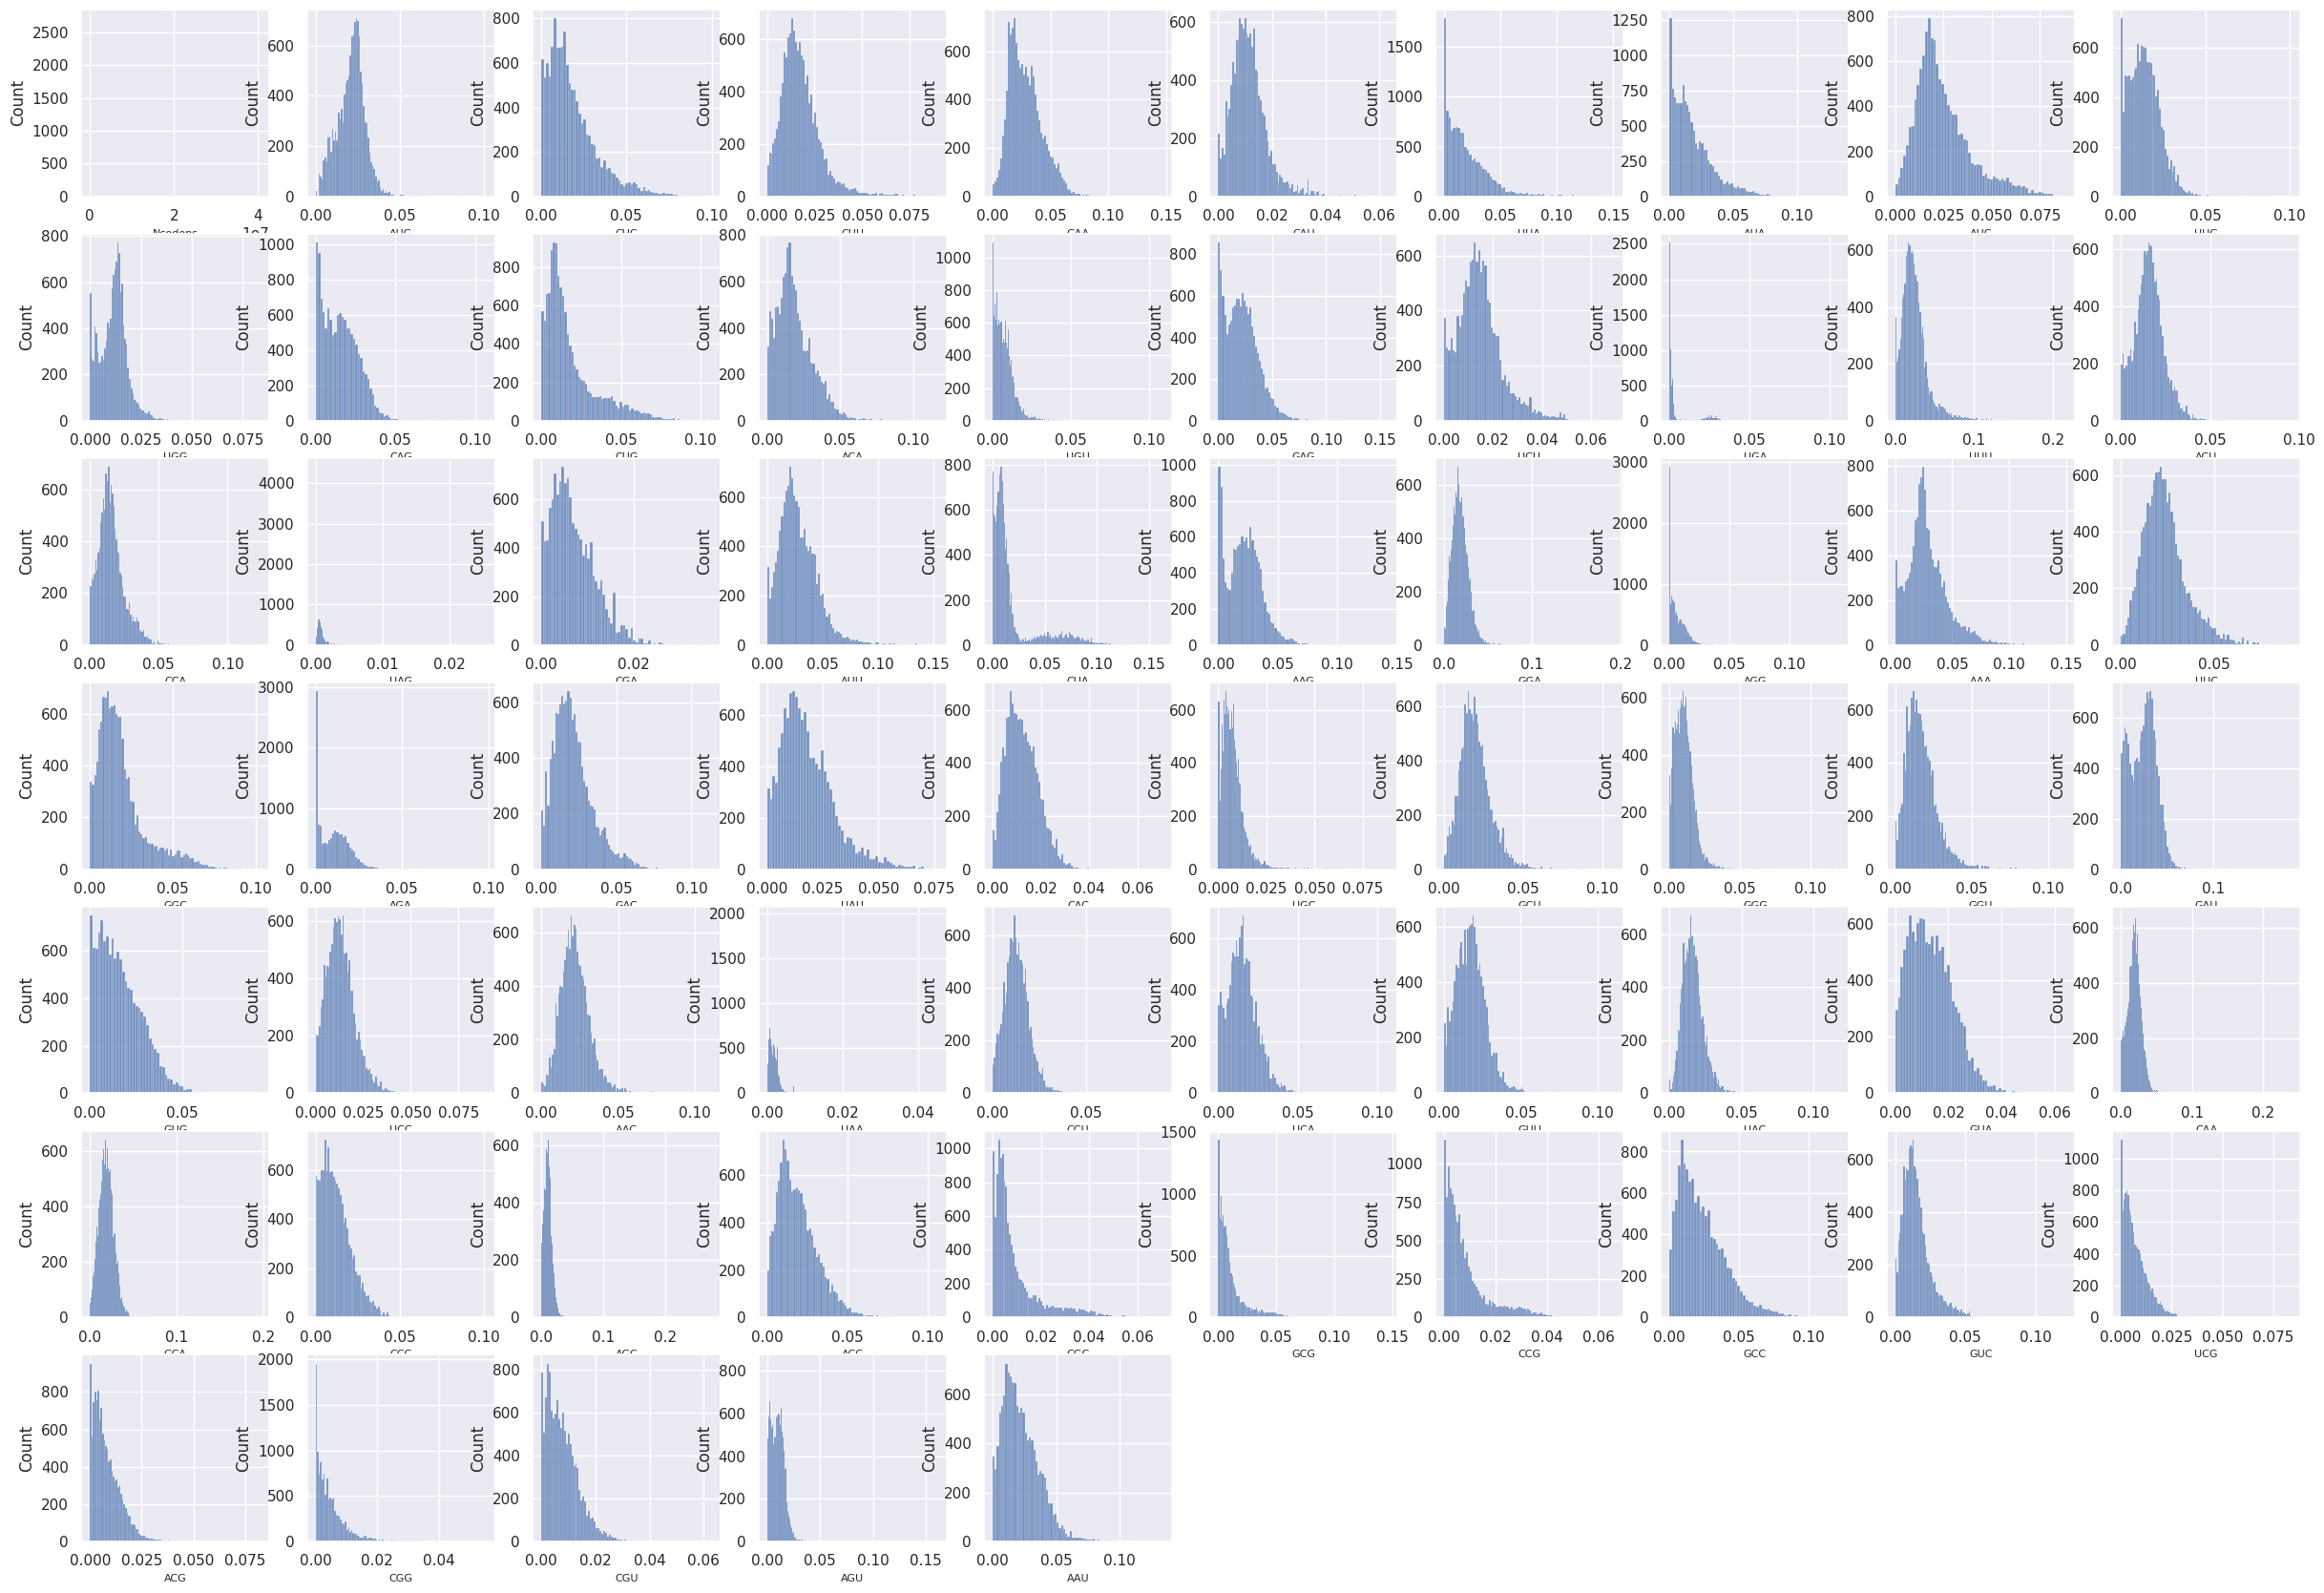

In [36]:
#¿Es la frecuencia de aparición de codones un indicador confiable para determinar el reino biológico al que pertenece una especie?
plt.figure(figsize = (30, 30))
Ngrafico = 1
for columna in DF_final:
    if Ngrafico <= 65:
        ax = plt.subplot(10, 10, Ngrafico)
        sns.histplot(DF_final[columna])
        plt.xlabel(columna, fontsize = 8)

    Ngrafico += 1
plt.show()

La variabilidad en la forma de las distribuciones sugiere que hay un sesgo en el uso de codones en el conjunto de datos. Algunos codones tienen frecuencias consistentemente altas o bajas, lo cual podría tener implicaciones biológicas en cuanto a la eficiencia de traducción o preferencias adaptativas. El sesgo en el uso de codones  es un fenómeno observado en organismos donde ciertos codones son preferidos sobre otros al codificar para el mismo aminoácido. Este sesgo no es aleatorio y puede estar influenciado por factores biológicos y evolutivos

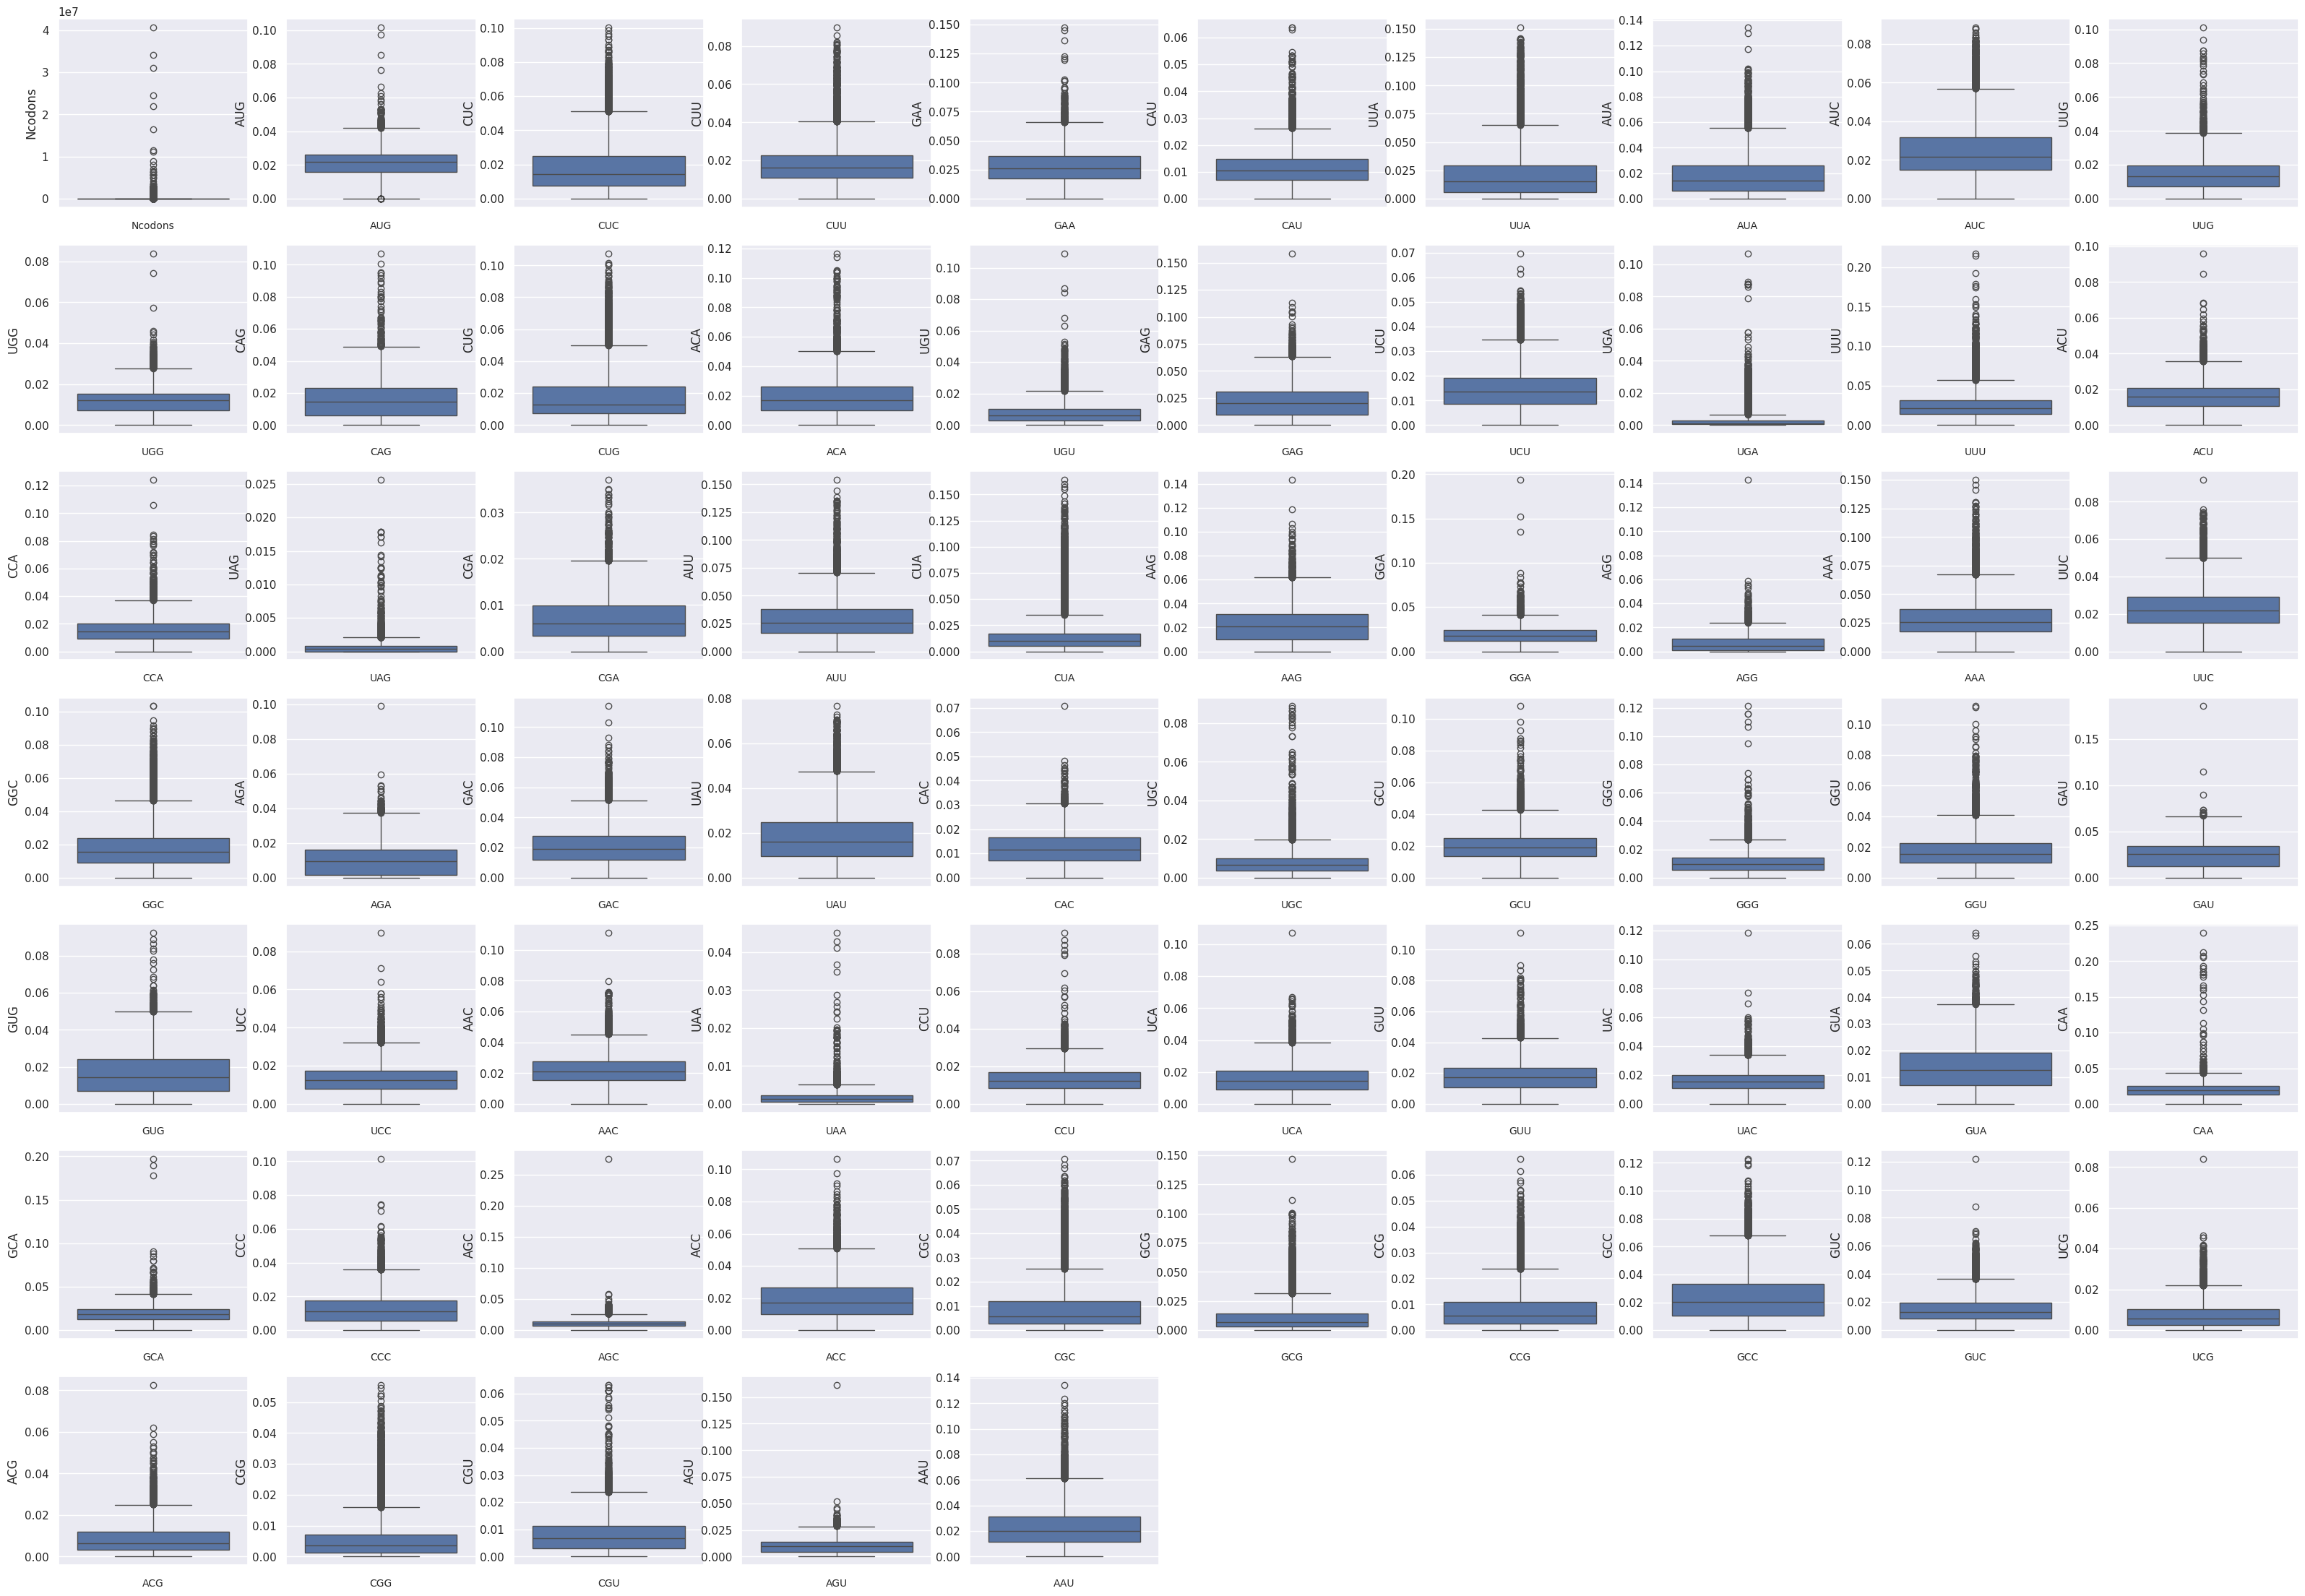

In [37]:
#visualización de la frecuencias de codones en secuencias de ARN
plt.figure(figsize = (40, 40))
Ngrafico = 1
for columna in DF_final:
    if Ngrafico <= 65:
        ax = plt.subplot(10, 10, Ngrafico)
        sns.boxplot(data=DF_final, y=columna)
        plt.xlabel(columna, fontsize = 10)

    Ngrafico += 1
plt.show()

Analsis bivariado

En este caso,  por el contexto de datos biológicos o secuenciales como las frecuencias de codones en secuencias de ARN, los "outliers" no indican errores o valores anómalos. En lugar de ser datos atípicos que deberían eliminarse, esos puntos extremos reflejan características biológicas reales, como la alta o baja frecuencia de ciertos codones en una secuencia específica.

En biología, especialmente en estudios de genética, estas variaciones en frecuencia son de gran interés, ya que podrían reflejar propiedades adaptativas, tendencias evolutivas o sesgos en el uso de estos por parte de ciertas especies.

In [38]:
# Creo un dataframe para agrupar los codones segun los aminoacidos para los que codifican y los clasifico
data = {'Aminoácido': ['Alanina', 'Valina', 'Leucina', 'Isoleucina','Fenilalanina', 'Triptofano', 'Tirosina', 'Glicina','Prolina', 'Serina', 'Treonina', 'Cisteína','Asparagina', 'Glutamina', 'Lisina', 'Arginina',
        'Histidina', 'Ácido aspártico', 'Ácido glutámico'],
    'Codones':
     ['GCU, GCC, GCA, GCG', 'GUU, GUC, GUA, GUG','UUA, UUG, CUU, CUC, CUA, CUG', 'AUU, AUC, AUA','UUU, UUC', 'UGG', 'UAU, UAC','GGU, GGC, GGA, GGG', 'CCU, CCC, CCA, CCG','UCU, UCC, UCA, UCG, AGU, AGC', 'ACU, ACC, ACA, ACG',
        'UGU, UGC', 'AAU, AAC', 'CAA, CAG','AAA, AAG', 'CGU, CGC, CGA, CGG, AGA, AGG','CAU, CAC', 'GAU, GAC', 'GAA, GAG'],
    'Clasificación': ['Hidrofóbico Alifático', 'Hidrofóbico Alifático', 'Hidrofóbico Alifático', 'Hidrofóbico Alifático','Hidrofóbico Aromático', 'Hidrofóbico Aromático', 'Hidrofóbico Aromático',
        'Hidrofóbico', 'Hidrofóbico','Hidrofílico Sin carga', 'Hidrofílico Sin carga', 'Hidrofílico Sin carga','Hidrofílico Sin carga', 'Hidrofílico Sin carga','Hidrofílico Cargado Positivamente', 'Hidrofílico Cargado Positivamente', 'Hidrofílico Cargado Positivamente',
        'Hidrofílico Cargado Negativamente', 'Hidrofílico Cargado Negativamente']}


df_aminoacidos = pd.DataFrame(data)

df_aminoacidos

,Aminoácido,Codones,Clasificación
0,Alanina,"GCU, GCC, GCA, GCG",Hidrofóbico Alifático
1,Valina,"GUU, GUC, GUA, GUG",Hidrofóbico Alifático
2,Leucina,"UUA, UUG, CUU, CUC, CUA, CUG",Hidrofóbico Alifático
3,Isoleucina,"AUU, AUC, AUA",Hidrofóbico Alifático
4,Fenilalanina,"UUU, UUC",Hidrofóbico Aromático
5,Triptofano,UGG,Hidrofóbico Aromático
6,Tirosina,"UAU, UAC",Hidrofóbico Aromático
7,Glicina,"GGU, GGC, GGA, GGG",Hidrofóbico
8,Prolina,"CCU, CCC, CCA, CCG",Hidrofóbico
9,Serina,"UCU, UCC, UCA, UCG, AGU, AGC",Hidrofílico Sin carga


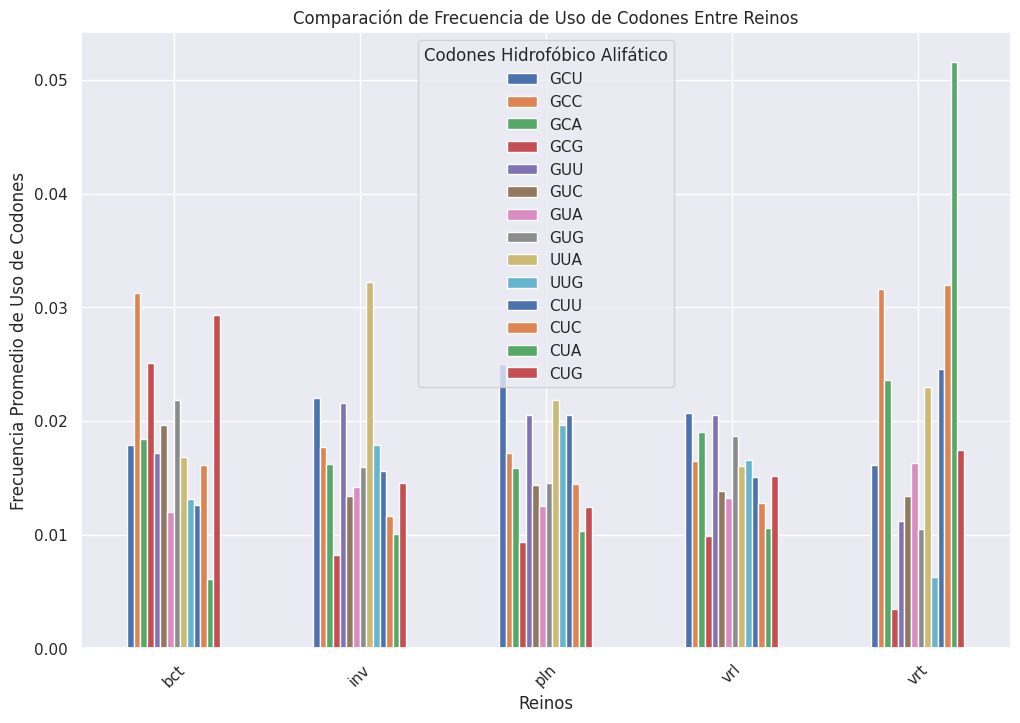

In [39]:
# Selección los codones Hidrofóbico Alifático
# Agrupando por "Kingdom" y calculando la media de la frecuencia de uso para cada codón seleccionado
Scodon = ["GCU", "GCC", "GCA", "GCG", "GUU", "GUC", "GUA", "GUG","UUA", "UUG", "CUU", "CUC", "CUA", "CUG"]
kingdom_prom = DF_final.groupby('Kingdom')[Scodon].mean(numeric_only=True)

# Configuración de la gráfica de barras para comparar los reinos
kingdom_prom.plot(kind='bar', figsize=(12, 8))
plt.title("Comparación de Frecuencia de Uso de Codones Entre Reinos")
plt.xlabel("Reinos")
plt.ylabel("Frecuencia Promedio de Uso de Codones")
plt.legend(title="Codones Hidrofóbico Alifático")
plt.xticks(rotation=45)
plt.show()

Codones Hidrofóbicos Alifáticos : Los codones alifáticos, que codifican aminoácidos no polares importantes para la estructura interna de proteínas, muestran variaciones en su frecuencia de uso entre los diferentes reinos. En general, algunos reinos parecen tener una mayor preferencia por codones específicos (por ejemplo, los codones "GCU" y "GCC" para alanina).

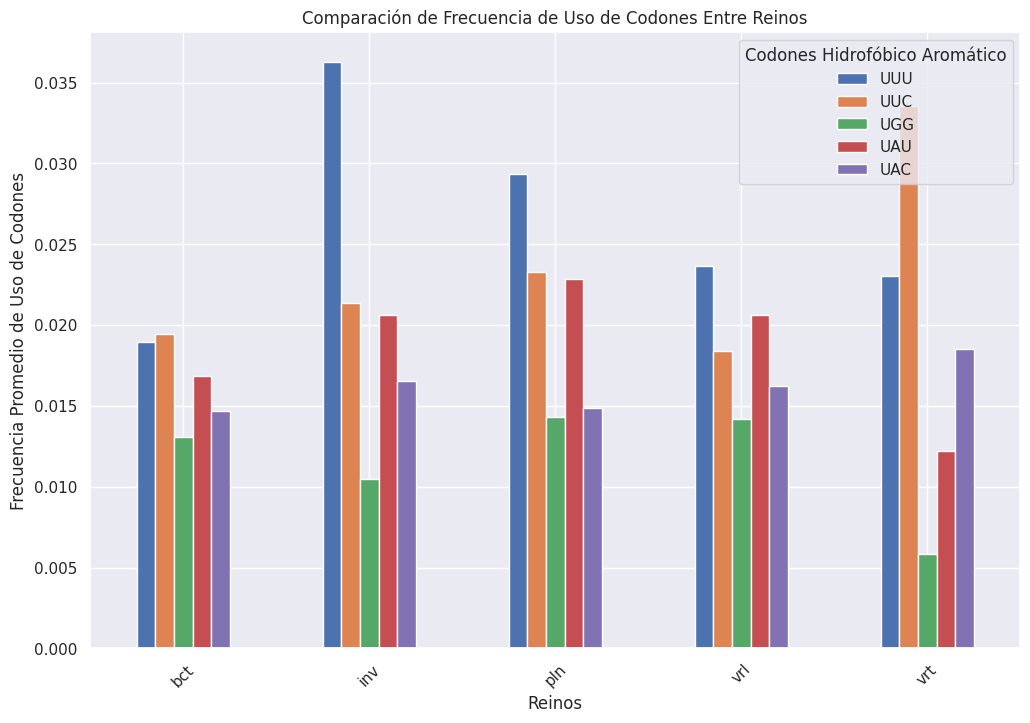

In [40]:
# Selección los codones Hidrofóbico Aromático
# Agrupando por "Kingdom" y calculando la media de la frecuencia de uso para cada codón seleccionado
Scodon = ["UUU", "UUC","UGG", "UAU", "UAC"]
kingdom_prom = DF_final.groupby('Kingdom')[Scodon].mean(numeric_only=True)

# Configuración de la gráfica de barras para comparar los reinos
kingdom_prom.plot(kind='bar', figsize=(12, 8))
plt.title("Comparación de Frecuencia de Uso de Codones Entre Reinos")
plt.xlabel("Reinos")
plt.ylabel("Frecuencia Promedio de Uso de Codones")
plt.legend(title="Codones Hidrofóbico Aromático")
plt.xticks(rotation=45)
plt.show()

Codones Hidrofóbicos Aromáticos : Los codones aromáticos, esenciales para aminoácidos como fenilalanina y tirosina, tienden a tener un uso más conservado y limitado a ciertos codones, aunque las preferencias específicas también varían ligeramente entre reinos.

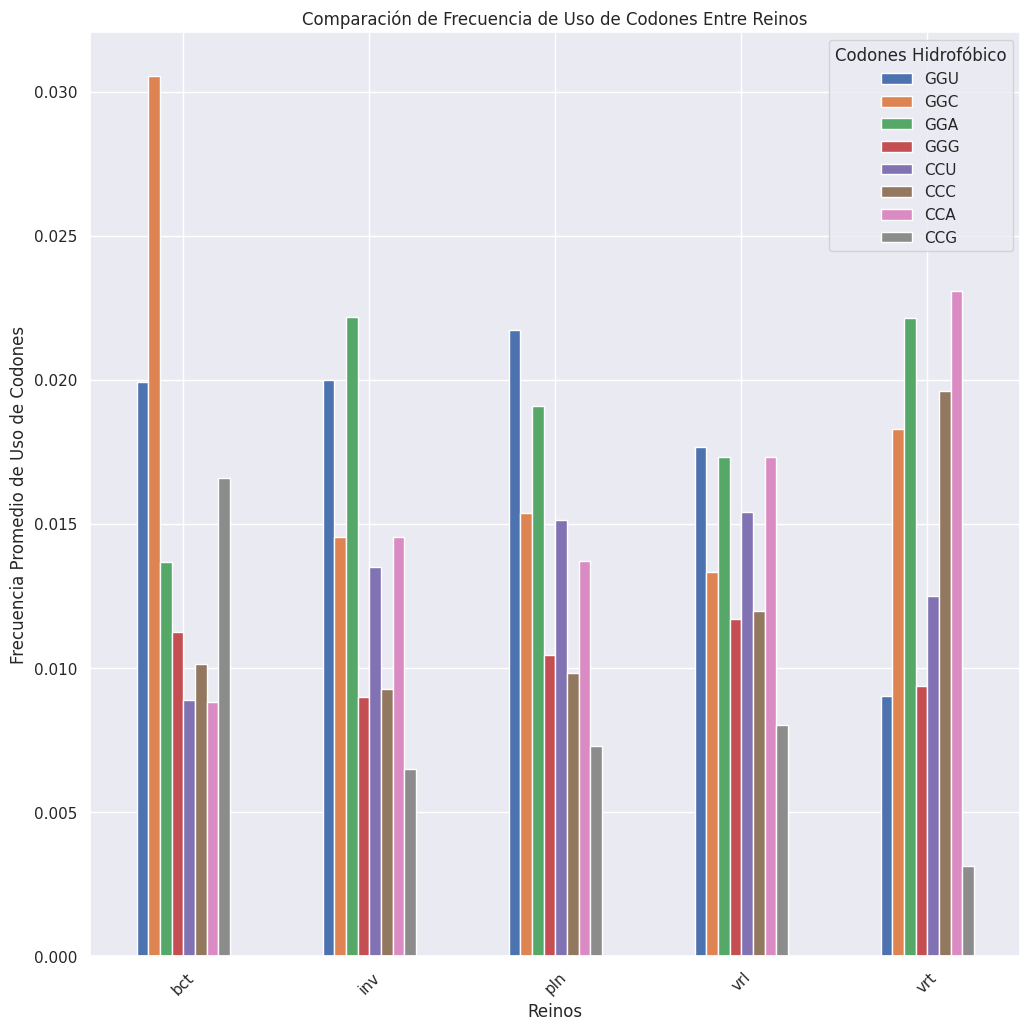

In [41]:
# Selección los codones Hidrofóbico
# Agrupando por "Kingdom" y calculando la media de la frecuencia de uso para cada codón seleccionado
Scodon = ['GGU', 'GGC', 'GGA', 'GGG', 'CCU', 'CCC', 'CCA', 'CCG']
kingdom_prom = DF_final.groupby('Kingdom')[Scodon].mean(numeric_only=True)

# Configuración de la gráfica de barras para comparar los reinos
kingdom_prom.plot(kind='bar', figsize=(12, 12))
plt.title("Comparación de Frecuencia de Uso de Codones Entre Reinos")
plt.xlabel("Reinos")
plt.ylabel("Frecuencia Promedio de Uso de Codones")
plt.legend(title="Codones Hidrofóbico")
plt.xticks(rotation=45)
plt.show()

Codones Hidrofóbicos Generales : En los codones hidrofóbicos en general (incluyendo glicina y prolina), observamos una diversidad en las frecuencias de uso según el reino. La variación en el uso de estos codones entre reinos puede estar ligada a diferencias en la compactación y flexibilidad de proteínas, lo que podría responder a las adaptaciones evolutivas para entornos específicos en cada reino.

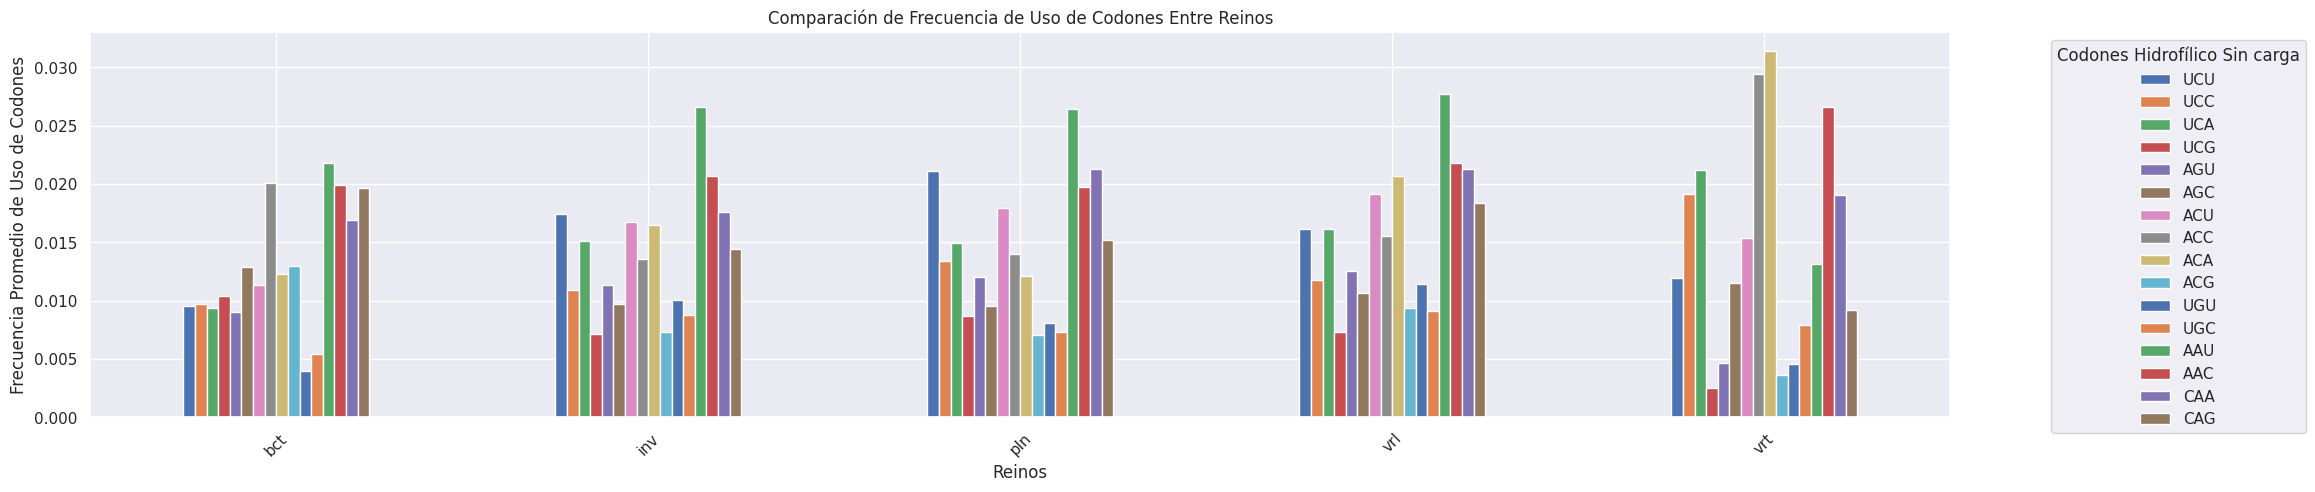

In [42]:
# Selección los codones Hidrofílico Sin carga
# Agrupando por "Kingdom" y calculando la media de la frecuencia de uso para cada codón seleccionado
Scodon = ['UCU', 'UCC', 'UCA', 'UCG', 'AGU', 'AGC', 'ACU', 'ACC', 'ACA','ACG','UGU','UGC','AAU', 'AAC','CAA', 'CAG']
kingdom_prom = DF_final.groupby('Kingdom')[Scodon].mean(numeric_only=True)

# Configuración de la gráfica de barras para comparar los reinos
kingdom_prom.plot(kind='bar', figsize=(24, 5))
plt.title("Comparación de Frecuencia de Uso de Codones Entre Reinos")
plt.xlabel("Reinos")
plt.ylabel("Frecuencia Promedio de Uso de Codones")
plt.legend(title="Codones Hidrofílico Sin carga", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

Codones Hidrofílicos Sin Carga : Para los codones hidrofílicos sin carga, el análisis muestra una preferencia diversificada entre los reinos, con ciertas frecuencias de uso consistentemente más altas en algunos de estos.


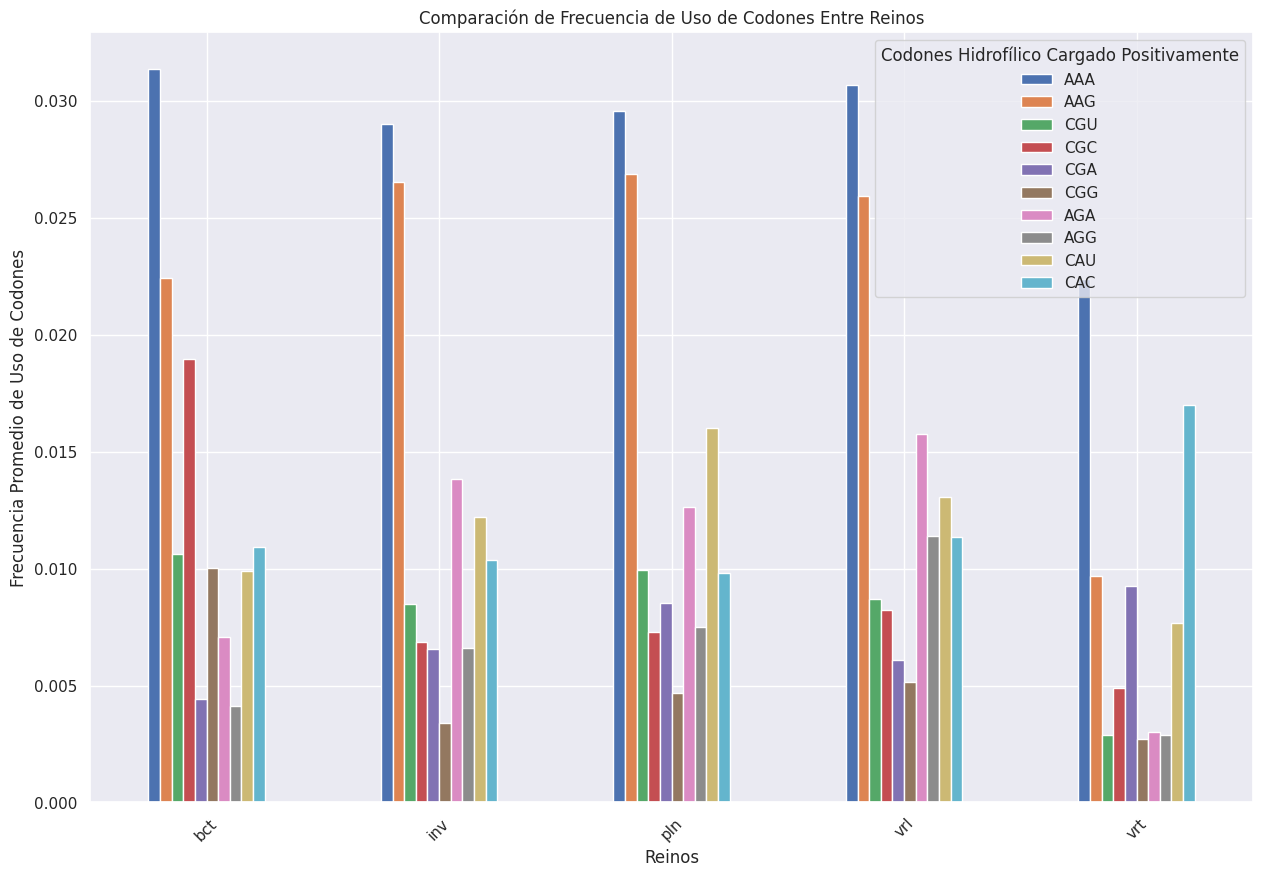

In [43]:
# Selección los codones Hidrofílico Cargado Positivamente
# Agrupando por "Kingdom" y calculando la media de la frecuencia de uso para cada codón seleccionado
Scodon =  ['AAA', 'AAG', 'CGU', 'CGC','CGA', 'CGG', 'AGA', 'AGG', 'CAU', 'CAC']
kingdom_prom = DF_final.groupby('Kingdom')[Scodon].mean(numeric_only=True)

# Configuración de la gráfica de barras para comparar los reinos
kingdom_prom.plot(kind='bar', figsize=(15, 10))
plt.title("Comparación de Frecuencia de Uso de Codones Entre Reinos")
plt.xlabel("Reinos")
plt.ylabel("Frecuencia Promedio de Uso de Codones")
plt.legend(title="Codones Hidrofílico Cargado Positivamente")
plt.xticks(rotation=45)
plt.show()


Codones Hidrofílicos Cargados Positivamente : Los codones que codifican aminoácidos cargados positivamente (como lisina y arginina) presentan también variaciones según el reino.

Los análisis univariado y bivariado ayudan a identificar patrones y relaciones entre la frecuencia de codones y el reino biológico, lo cual es una buena base para inferir su potencial como predictor. Se observa que hay codones que son propios de determinadas especies y no de otras.

In [44]:
# Inicializar el OneHotEncoder con categorías especificadas
encoder = OneHotEncoder(sparse_output=False)

# Aplicar One Hot Encoding a la columna 'Kingdom'
encoded = encoder.fit_transform(DF_final[['Kingdom']])

# Crear un DataFrame con las columnas codificadas
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['Kingdom']))

# Concatenar el DataFrame original con las columnas codificadas
DF_final = DF_final.reset_index(drop=True)
encoded_df = encoded_df.reset_index(drop=True)

# Concatenar el DataFrame original con las columnas codificadas
df = pd.concat([DF_final, encoded_df], axis=1)

df = df.dropna()
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 13026 entries, 9 to 13034
Data columns (total 74 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Ncodons      13026 non-null  int64  
 1   AUG          13026 non-null  float64
 2   CUC          13026 non-null  float64
 3   CUU          13026 non-null  float64
 4   GAA          13026 non-null  float64
 5   CAU          13026 non-null  float64
 6   UUA          13026 non-null  float64
 7   AUA          13026 non-null  float64
 8   AUC          13026 non-null  float64
 9   UUG          13026 non-null  float64
 10  UGG          13026 non-null  float64
 11  CAG          13026 non-null  float64
 12  CUG          13026 non-null  float64
 13  ACA          13026 non-null  float64
 14  UGU          13026 non-null  float64
 15  GAG          13026 non-null  float64
 16  UCU          13026 non-null  float64
 17  UGA          13026 non-null  float64
 18  UUU          13026 non-null  float64
 19  ACU      

# **Desarrollo del modelo**

**Inicialmente** se evaluarán varios algoritmos de clasificación comunes para predecir la variable objetivo. La selección del mejor modelo se basará en:
accuracy, precisión, recall y F1-score para obtener una visión más completa del rendimiento de los modelos. Se generará la curva ROC para cada modelo y se analizará el punto de operación óptimo en función de la importancia relativa de los falsos positivos y los falsos negativos en este contexto

<font size="5"> Arbol de decisiones

In [45]:
# defino las varaibles
y = df[['Kingdom_bct', 'Kingdom_vrl', 'Kingdom_pln', 'Kingdom_inv']].idxmax(axis=1)

# Eliminar las columnas One Hot Encoded y las columnas objetos del conjunto de datos
X = df.drop(['Kingdom_bct', 'Kingdom_vrl', 'Kingdom_inv', 'SpeciesName', 'Kingdom'], axis=1)

In [46]:
#Divido las variables para entenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((10420, 69), (10420,), (2606, 69), (2606,))

In [47]:
# Instancia
decision_tree = DecisionTreeClassifier(random_state=1234)

# Entrena
yy=decision_tree.fit(X_train, y_train)

# Predice
y_predad = decision_tree.predict(X_test)

In [48]:
# Instancia
decision_tree = DecisionTreeClassifier(random_state=1234, max_depth=13)

# Entrena
yy=decision_tree.fit(X_train, y_train)

# Predice
y_predad = decision_tree.predict(X_test)

In [49]:
accuracy = accuracy_score(y_test, y_predad)

# Mostrar la precisión
print(f'Accuracy: {accuracy}')

Accuracy: 0.9182655410590944


In [50]:
# Calcular la exactitud (Accuracy)
accuracyad = accuracy_score(y_test, y_predad)
# Precision
precision = metrics.precision_score(y_test, y_predad, average='weighted')
#Sensibilidad
recall = metrics.recall_score(y_test, y_predad, average='weighted')
#F1_score
f1 =metrics.f1_score(y_test, y_predad, average='weighted')

print("F1 Score:", f1)
print("Presisicion:",precision)
print("Recall:",recall)
print("Exactitud:", accuracyad)
print("F1 Score:", f1)

F1 Score: 0.9182503539250522
Presisicion: 0.9182688498357687
Recall: 0.9182655410590944
Exactitud: 0.9182655410590944
F1 Score: 0.9182503539250522


<font size="5"> Determinar cual es el mejor arbol de desición en base al valor de max_depth tomando como parárametro el accuracy

In [51]:
#enumeramos las columnas del dataset
colum=[]
for indice, columna in enumerate(df.columns):
    colum.append(indice)
if colum:
  colum.pop(0)  # elimino el 0 del indice
print(colum)
# la cantida maxima de max_depth son 80

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73]


In [52]:

#probar todos max_depth y determinar el mejor
maxd=colum
valores_acc=[]
for max_depth in maxd:
  arbol_desisicion=DecisionTreeClassifier(random_state=1234, max_depth=max_depth)# instanciar
  arbol_desisicion.fit(X_train, y_train) #entrear
  predic_y= arbol_desisicion.predict(X_test) #predecir
  accuracyrf= accuracy_score(y_test, predic_y) #medir el nivel de predicción
  valores_acc.append(accuracyrf) #rellenar la lista de valores accuracy para cada accuracy
max_acc=max(valores_acc) #cual es el valor de exctitud maxima en la lista
indic_max_acc=valores_acc.index(max_acc)+1#busco el indice maximo que teiene la mayor exactitud le sumo uno porque el indice arranca de cero y el valor cero lo elimine de la losta
indic_max_acc, max_acc

(13, 0.9182655410590944)

[Text(0.4935660177831492, 0.9642857142857143, 'x[67] <= 0.5\ngini = 0.676\nsamples = 10420\nvalue = [4908.0, 1054.0, 2028.0, 2430.0]'),
 Text(0.49080358684392267, 0.8928571428571429, 'x[14] <= 0.006\ngini = 0.558\nsamples = 8392\nvalue = [4908.0, 1054.0, 0.0, 2430.0]'),
 Text(0.4921848023135359, 0.9285714285714286, 'True  '),
 Text(0.24177205628453038, 0.8214285714285714, 'x[31] <= 0.003\ngini = 0.263\nsamples = 4490\nvalue = [3826, 303, 0, 361]'),
 Text(0.10932104627071823, 0.75, 'x[35] <= 0.014\ngini = 0.082\nsamples = 3021\nvalue = [2893, 52, 0, 76]'),
 Text(0.0874266229281768, 0.6785714285714286, 'x[16] <= 0.029\ngini = 0.057\nsamples = 2959\nvalue = [2873, 25, 0, 61]'),
 Text(0.06435600828729282, 0.6071428571428571, 'x[1] <= 0.033\ngini = 0.044\nsamples = 2934\nvalue = [2868.0, 24.0, 0.0, 42.0]'),
 Text(0.03617058011049724, 0.5357142857142857, 'x[17] <= 0.001\ngini = 0.032\nsamples = 2879\nvalue = [2833, 18, 0, 28]'),
 Text(0.016574585635359115, 0.4642857142857143, 'x[35] <= 0.008

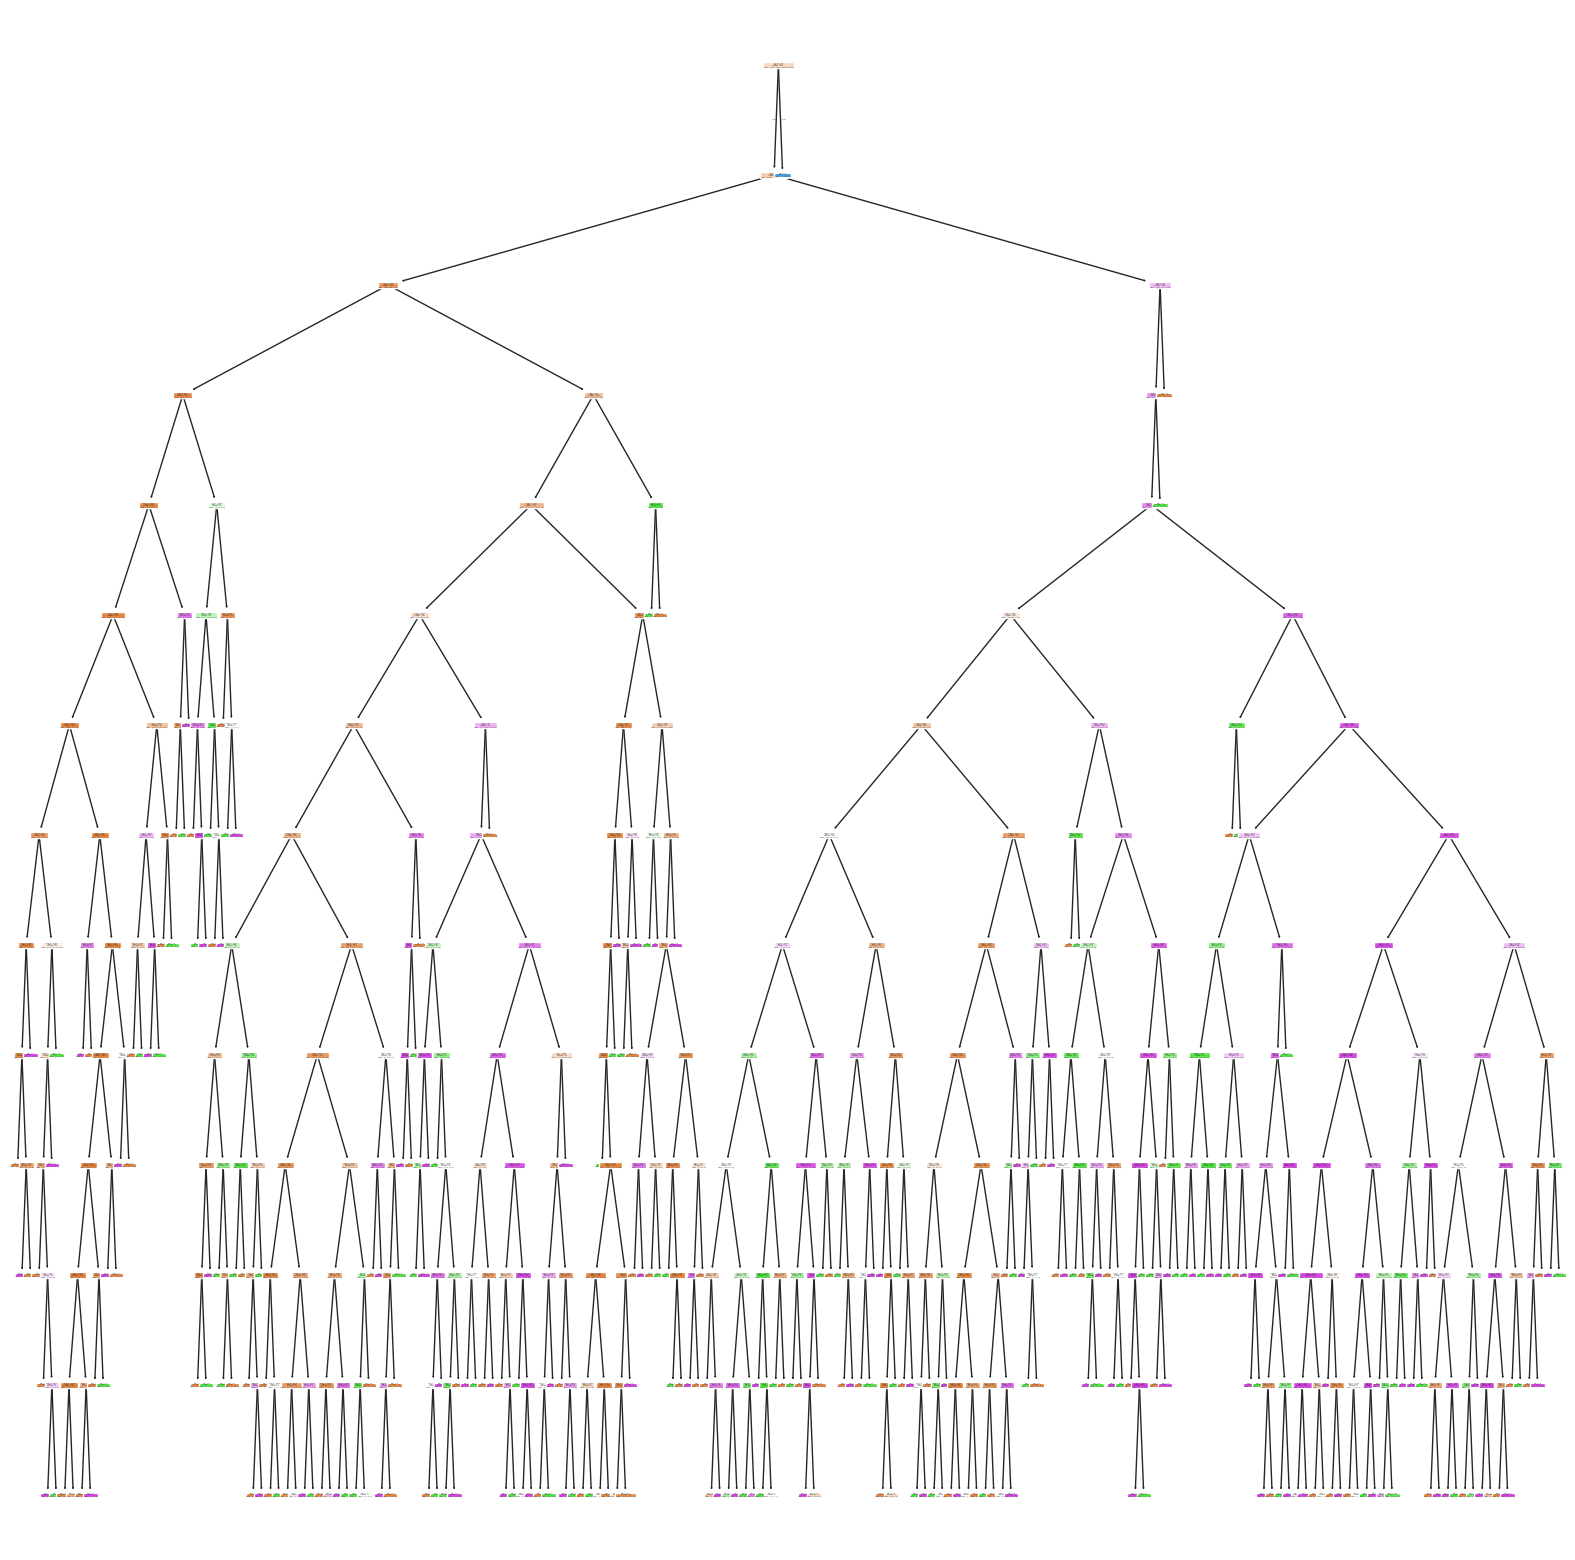

In [53]:
# Graficando
decision_t = DecisionTreeClassifier(random_state=1234, max_depth=13)
fig = plt.figure(figsize=(20,20))
tree.plot_tree(decision_t.fit(X_train, y_train), filled=True)

<font size="5"> RandomForestClassifier

In [54]:
#Entrenamos
rf = RandomForestClassifier(random_state=1234)
rf.fit(X_train, y_train)

#predecimios
y_predrf = rf.predict(X_test)

#medimos exactitud
accuryacrf = accuracy_score(y_test, y_predrf)
accuryacrf
# Precision
precisionrf = precision_score(y_test, y_predrf, average='weighted')
#sensibilidad
recallrf = metrics.recall_score(y_test, y_predrf, average='weighted')
#F1_score
f1rf =metrics.f1_score(y_test, y_predrf, average='weighted')
print("Presisicion:",precisionrf)
print("Recall:",recallrf)
print("Exactitud:", accuryacrf)
print("F1_score:", f1rf )


Presisicion: 0.9631432761387487
Recall: 0.9623944742900997
Exactitud: 0.9623944742900997
F1_score: 0.9618302635094554


<font size="5"> KNN

In [55]:
KNN = KNeighborsClassifier(n_neighbors=13)
# Entrenar el clasificador con los datos de entrenamiento
KNN.fit(X_train, y_train)

# Predecir las etiquetas para los datos de prueba
prediccionknn = KNN.predict(X_test)
#exactitud
accuracyknn= accuracy_score(y_test, prediccionknn)
# Precision
precisionknn = metrics.precision_score(y_test, prediccionknn, average='weighted')
#recall
recallknn = metrics.recall_score(y_test, prediccionknn, average='weighted')
#F1_score
f1knn =metrics.f1_score(y_test, prediccionknn, average='weighted')
print("Presisicion:",precisionknn)
print("Recall:",recallknn)
print("Exactitud:", accuracyknn)
print("F1_score:", f1knn )

Presisicion: 0.6265111198658585
Recall: 0.613584036838066
Exactitud: 0.613584036838066
F1_score: 0.5977773668726357


<font size="5"> Regresión logistica



In [56]:
model = LogisticRegression(max_iter=10000, n_jobs=-1)
model.fit(X_train, y_train)
prediccioneslr = model.predict(X_test)
#predicciones
accuracyklg= accuracy_score(y_test, prediccioneslr)
# Precision
precisionlg = metrics.precision_score(y_test, prediccioneslr, average='weighted', zero_division=1)
#recall
recalllg = metrics.recall_score(y_test, prediccioneslr, average='weighted')
#F1_score
f1rl =metrics.f1_score(y_test, prediccioneslr, average='weighted')
print("accuracy:",accuracyklg)
print("Presisicion:",precisionlg)
print("Recall:",recalllg)
print("F1_score:", f1rl )


accuracy: 0.7390636991557943
Presisicion: 0.7683272373448046
Recall: 0.7390636991557943
F1_score: 0.729596747569937


In [57]:
#armamos un cuadro de cpmparcion de los modelos
Datos= {"categorias": ["arbol de desición", "knn", "random forest", "regresión logistica"], "accuracy":[accuracyad, accuracyknn, accuryacrf, accuracyklg],
        "Presicion":[precision, precisionknn, precisionrf, precisionlg], "recall":[recall, recallknn, recallrf, recalllg ], "F1_score":[f1, f1knn, f1rf, f1rl] }
pd.DataFrame(Datos). round(2)



,categorias,accuracy,Presicion,recall,F1_score
0,arbol de desición,0.92,0.92,0.92,0.92
1,knn,0.61,0.63,0.61,0.60
2,random forest,0.96,0.96,0.96,0.96
3,regresión logistica,0.74,0.77,0.74,0.73


Random Forest es el modelo que tiene el mejor rendimiento general, con un accuracy, precision, recall y F1-score de 0.94. Esto indica que Random Forest es el modelo más robusto y equilibrado en cuanto a las métricas clave de rendimiento. La alta precisión y recall indican que este modelo es efectivo tanto para identificar correctamente las clases positivas como para minimizar los falsos negativos.


#  Ensayos en el algoritmo RandomForestClassifier para conseguir mejores métricas

<font size="5"> Cantidad de variables

In [59]:
valores_max_features = [i for i in range(1, 71)]  # Del 1 al 70

# Listas para almacenar métricas
precisiones = []
sensibilidades = []
exactitudes = []
f1_scores = []

# Bucle para ajustar y evaluar el modelo
for max_features in valores_max_features:
    if max_features > X_train.shape[1]:  # Evitar valores de max_features mayores a las características
        continue
    rf = RandomForestClassifier(random_state=1234, max_features=max_features)
    rf.fit(X_train, y_train)
    y_predrf = rf.predict(X_test)
      #medimos exactitud
    accuracyacrf = accuracy_score(y_test, y_predrf)
      # Precision
    precisionrf = precision_score(y_test, y_predrf, average='weighted')
      #sensibilidad
    recallrf = recall_score(y_test, y_predrf, average='weighted')
      recallrf = metrics.recall_score(y_test, y_predrf, average='weighted')
      #F1_score
    f1rf = f1_score(y_test, y_predrf, average='weighted')
    # Guardar métricas
    precisiones.append(precisionrf)
    sensibilidades.append(recallrf)
    exactitudes.append(accuracyacrf)
    f1_scores.append(f1rf)

# Crear DataFrame
df_resultados = pd.DataFrame({
    'Precision': precisiones,
    'Recall': sensibilidades,
    'Exactitud': exactitudes,
    'F1_Score': f1_scores
}, index=valores_max_features[:len(precisiones)])  # Asegurar índices consistentes

# Mostrar resultados
print(df_resultados)

    Precision    Recall  Exactitud  F1_Score
1    0.926155  0.922870   0.922870  0.917606
2    0.940823  0.938987   0.938987  0.936171
3    0.954092  0.953185   0.953185  0.951793
4    0.956797  0.955871   0.955871  0.954864
5    0.959516  0.958557   0.958557  0.957652
..        ...       ...        ...       ...
65   0.959156  0.958557   0.958557  0.958164
66   0.957325  0.956639   0.956639  0.956253
67   0.958859  0.957790   0.957790  0.957314
68   0.957888  0.957022   0.957022  0.956667
69   0.958204  0.957406   0.957406  0.956904

[69 rows x 4 columns]


In [81]:
df_resultados.head(30)

,Precision,Recall,Exactitud,F1_Score
1,0.926155,0.922870,0.922870,0.917606
2,0.940823,0.938987,0.938987,0.936171
3,0.954092,0.953185,0.953185,0.951793
4,0.956797,0.955871,0.955871,0.954864
5,0.959516,0.958557,0.958557,0.957652
6,0.962314,0.961627,0.961627,0.960914
7,0.963966,0.963162,0.963162,0.962571
8,0.963143,0.962394,0.962394,0.961830
9,0.967224,0.966616,0.966616,0.966262
10,0.963716,0.962778,0.962778,0.962303


In [72]:

maximos_por_columna = df_resultados.max()
maximos_por_columna


,0
Precision,0.967252
Recall,0.966616
Exactitud,0.966616
F1_Score,0.966353


In [79]:
maximos_por_columna = df_resultados.max()       # Valores máximos
indices_maximos = df_resultados.idxmax()        # Índices correspondientes a los valores máximos
maximos_por_columna,indices_maximos

(Precision    0.967252
 Recall       0.966616
 Exactitud    0.966616
 F1_Score     0.966353
 dtype: float64,
 Precision    21
 Recall        9
 Exactitud     9
 F1_Score     21
 dtype: int64)

<font size="4"> Los mejores valores métricos se logran cuando max_features es de 21, alcanzando una precisión del 96%, una sensibilidad del 96% y una exactitud del 96%

<font size="5"> Cantidad de árboles

In [92]:
n_estimator = [ 1, 5, 10, 15, 20, 25, 50, 75, 100]# los valores que va a tomar n_stimator
#creo listas para almacenar los valores de las métricas
precisiones = []
sensibilidades = []
exactitudes = []
f1_scores = []

for n_estimators in n_estimator:
    rf = RandomForestClassifier(random_state=1234, max_features=21, n_estimators=n_estimators)
    rf.fit(X_train, y_train)  # Entrenamiento del modelo
    y_predrf = rf.predict(X_test)  # Predicciones

    # Medimos las métricas
    accuracyrf = accuracy_score(y_test, y_predrf)  # Exactitud
    precisionrf = precision_score(y_test, y_predrf, average='weighted')  # Precisión
    recallrf = recall_score(y_test, y_predrf, average='weighted')  # Sensibilidad
    f1rf = f1_score(y_test, y_predrf, average='weighted')  # F1 Score
  # Agrego métricas a las listas
    precisiones.append(precisionrf)
    sensibilidades.append(recallrf)
    exactitudes.append(accuracyrf)
    f1_scores.append(f1rf)

# Creo el DataFrame con los resultados
df_resultados = pd.DataFrame({
    'Precision': precisiones,
    'Recall': sensibilidades,
    'Exactitud': exactitudes,
    'F1_Score': f1_scores
}, index=n_estimator)

df_resultados

,Precision,Recall,Exactitud,F1_Score
1,0.905666,0.905602,0.905602,0.905630
5,0.941432,0.942057,0.942057,0.941205
10,0.955765,0.955487,0.955487,0.955032
15,0.958354,0.958173,0.958173,0.957609
20,0.961063,0.960860,0.960860,0.960335
25,0.960726,0.960476,0.960476,0.960023
50,0.964599,0.963929,0.963929,0.963459
75,0.966720,0.965848,0.965848,0.965564
100,0.967252,0.966616,0.966616,0.966353


In [94]:
maximos_por_columna = df_resultados.max()
maximos_por_columna

,0
Precision,0.967252
Recall,0.966616
Exactitud,0.966616
F1_Score,0.966353


<font size="4"> Los mejores valores métricos se logran cuando el n_estimators es de 75, alcanzando una precisión del 96%, una sensibilidad del 96% y una exactitud del 96%

<font size="5"> Cantidad de ramas

In [99]:
ramas = [i for i in range(1, 71)]  # Del 1 al 70 los valores que va a tomar max_depth
#creo listas para almacenar los valores de las métricas
precisiones = []
sensibilidades = []
exactitudes = []
f1_scores = []

for max_depth in ramas:
  rf = RandomForestClassifier(random_state=1234, max_features=21, n_estimators=75, max_depth=max_depth)
  rf.fit(X_train, y_train)
  y_predrf = rf.predict(X_test)
  #exactitud
  accuryacrf = accuracy_score(y_test, y_predrf)
  # Precision
  precisionrf = metrics.precision_score(y_test, y_predrf, average='weighted')
  #sensibilidad
  recallrf = metrics.recall_score(y_test, y_predrf, average='weighted')
  #F1_score
  f1rf =metrics.f1_score(y_test, y_predrf, average='weighted')

# Agrego métricas a las listas
  precisiones.append(precisionrf)
  sensibilidades.append(recallrf)
  exactitudes.append(accuryacrf)
  f1_scores.append(f1rf)
df_resultados = pd.DataFrame({'Precision': precisiones,'Recall': sensibilidades,'Exactitud': exactitudes,'F1_Score': f1_scores})
df_resultados.index = ramas
df_resultados

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Precision,Recall,Exactitud,F1_Score
1,0.451268,0.650038,0.650038,0.523270
2,0.719221,0.797391,0.797391,0.754791
3,0.839551,0.808135,0.808135,0.765070
4,0.868905,0.847659,0.847659,0.830403
5,0.878028,0.862625,0.862625,0.846084
...,...,...,...,...
66,0.966720,0.965848,0.965848,0.965564
67,0.966720,0.965848,0.965848,0.965564
68,0.966720,0.965848,0.965848,0.965564
69,0.966720,0.965848,0.965848,0.965564


In [101]:
maximos_por_columna = df_resultados.max()       # Valores máximos
indices_maximos = df_resultados.idxmax()        # Índices correspondientes a los valores máximos
maximos_por_columna,indices_maximos

(Precision    0.968883
 Recall       0.968150
 Exactitud    0.968150
 F1_Score     0.967849
 dtype: float64,
 Precision    24
 Recall       24
 Exactitud    24
 F1_Score     24
 dtype: int64)

<font size="4"> Los mejores valores métricos se logran cuando el numero de ramas es de 24, alcanzando una precisión del 97%, una sensibilidad del 97% y una exactitud del 97%

<font size="5">Analizar si el algoritmo es bueno frente a datos nuevos

In [104]:
# defino las varaibles
y = df[['Kingdom_bct', 'Kingdom_vrl', 'Kingdom_pln', 'Kingdom_inv']].idxmax(axis=1)
X = df.drop(['Kingdom_bct', 'Kingdom_vrl', 'Kingdom_inv', 'SpeciesName', 'Kingdom'], axis=1)
#Divido las variables para entenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Instanciar
rf = RandomForestClassifier(random_state=1234, max_features=21, n_estimators=75, max_depth=24)
scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')
#Entrenamos
rf.fit(X_train, y_train)

#predecimios
y_predrf = rf.predict(X_test)

#medimos exactitud
accuryacrf = accuracy_score(y_test, y_predrf)
accuryacrf
# Precision
precisionrf = metrics.precision_score(y_test, y_predrf, average='weighted')
#sensibilidad
recallrf = metrics.recall_score(y_test, y_predrf, average='weighted')
f1rf =metrics.f1_score(y_test, y_predrf, average='weighted')
print("Presisicion:",precisionrf)
print("Recall:",recallrf)
print("Exactitud:", accuryacrf)
print("F1_score:", f1rf )
print(scores)

Presisicion: 0.9688831723260165
Recall: 0.9681504221028396
Exactitud: 0.9681504221028396
F1_score: 0.9678489618995136
[0.9659309  0.9668906  0.96353167 0.97264875 0.96833013]


<font size="4"> El modelo de Random Forest está mostrando un rendimiento sobresaliente en términos de exactitud, precisión, recall y F1-Score. Además, los resultados obtenidos mediante validación cruzada son consistentes, lo que sugiere que el modelo generaliza bien y no está sobreajustado a una partición específica de los datos. En general, no se observan grandes diferencias entre las métricas, lo que refuerza la idea de que el modelo tiene un rendimiento excelente y es confiable para su uso en la predicción de nuevas observaciones.